In [13]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [14]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:99% !important; }</style>"))

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from datetime import date, timedelta
import numpy as np
import random
pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(precision=5)

In [16]:
my_data=pd.read_csv('RefinedData.csv')
date_list=sorted(my_data['DATE'].unique())
len_first=len(my_data)
av_val=my_data['VALUE_AUD_MEAN'].mean()
my_data=my_data[my_data['SUM_LIMIT']>0]
len_end=len(my_data)
print(my_data.columns)


Index(['Unnamed: 0', 'CODE', 'Unnamed: 0.1', 'DATE', 'MC', 'MH', 'ML', 'MO',
       'NC', 'NET_CHANGE', 'NH', 'NL', 'NO', 'SQ', 'UNIT', 'VALUE', 'VOLUME',
       'VWAP', 'SQTYPE', 'PREVIOUS_DAY', 'NEXT_DAY', 'MO_NEXTDAY',
       'MH_NEXTDAY', 'MC_NEXTDAY', 'ML_NEXTDAY', 'NO_NEXTDAY', 'NL_NEXTDAY',
       'NC_NEXTDAY', 'NH_NEXTDAY', 'NC_LASTDAY', 'DAILY_LIMIT', 'LIMIT_UP',
       'LIMIT_DOWN', 'OPEN_LU', 'OPEN_LD', 'MORNING_LU', 'MORNING_LD',
       'NIGHT_LU', 'NIGHT_LD', 'VALUE_AUD_MEAN', 'SUM_LIMIT', 'LIMIT_CLASS',
       'LIMIT_U', 'LIMIT_D', 'LIMIT_STATUS', 'DELTA_OPEN', 'DELTA_CLOSE',
       'DELTA_OPEN_CLASS', 'DELTA_CLOSE_CLASS', 'APP_LIMIT', 'DELTA_OPEN_P',
       'DELTA_CLOSE_P'],
      dtype='object')


/home/user/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


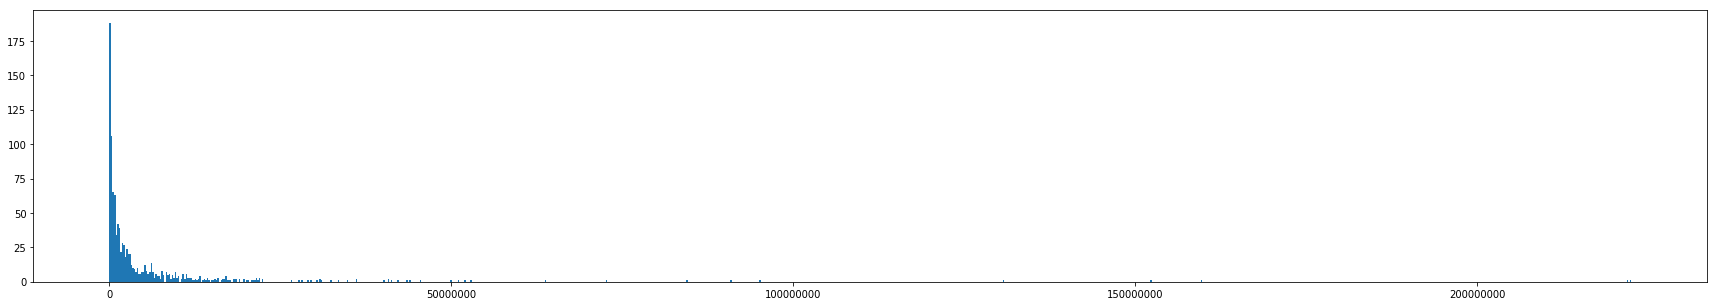

In [17]:
plt.figure(figsize=(30,5))
plt.hist(my_data['VALUE_AUD_MEAN'].unique(),bins=1000)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,0))
plt.show()


In [18]:
def conseq_test(FILTER,trade_list,return_frame):
    
    print("/-"*50)
    print("CONSEQ TEST")
    print("LIMIT:",FILTER)
    
    plt.figure(figsize=(30,10)) 
    return_frame_2=pd.DataFrame(trade_list,columns=['CODE','ENTRY_DATE','EXIT_DATE','ENTRY_PRICE','EXIT_PRICE','AVVAL'])
    

    return_frame_2['RETURN']=(return_frame_2['EXIT_PRICE']-return_frame_2['ENTRY_PRICE'])/return_frame_2['ENTRY_PRICE']
    stdev_return=return_frame_2['RETURN'].std()
    print("STDDEV:",stdev_return)
    print("MEAN:",return_frame_2['RETURN'].mean())



    


    #plt.show()   

    return_frame_2['ENTRY_DATE']=pd.to_datetime(return_frame_2['ENTRY_DATE'])
    return_frame_2['EXIT_DATE']=pd.to_datetime(return_frame_2['EXIT_DATE'])
    days_between=[]
    for x in range(len(return_frame_2)):
        my_slice=return_frame_2.iloc[x,:]
        d1=my_slice['ENTRY_DATE']
        d2=my_slice['EXIT_DATE']
        delta = d2 - d1         # timedelta
        ii=0
        for i in range(delta.days + 1):
            my_day=(d1 + timedelta(i)).strftime('%Y-%m-%d')

            if my_day in date_list:
                ii+=1
        days_between.append(ii-1)
    return_frame_2['CONSEQ_EVENTS']=days_between
    
    return_frame_2=return_frame_2[return_frame_2['CONSEQ_EVENTS']<=FILTER]
    AA=(len(return_frame))
    BB=(len(return_frame_2))
    print("EVENTS EXCLUDED:",AA-BB)
    print("Total Events:",len(return_frame_2))
    plt.figure(figsize=(30,10))
    plt.subplot("131")
    plt.title("EQUITY CURVE")
    return_frame_2.groupby(['EXIT_DATE'])['RETURN'].sum().sort_index().cumsum().plot()
    
    plt.subplot("133")
    plt.title("CONSEQ EVENTS")
    
    return_frame_2['CONSEQ_EVENTS'].hist(bins=10)
    #plt.show()
    plt.subplot("132")
    plt.title("HISTOGRAM OF RETURNS")
    plt.hist(return_frame_2['RETURN'])
    
    plt.show()

In [19]:
def stdev_test(FILTER,trade_list,return_frame,reverse):
    
    print("*"*100)
    print("STDEV LIMIT TEST")
    print("LIMIT:",FILTER)
    
    plt.figure(figsize=(30,10)) 
    return_frame_2=pd.DataFrame(trade_list,columns=['CODE','ENTRY_DATE','EXIT_DATE','ENTRY_PRICE','EXIT_PRICE','AVVAL'])
    

    return_frame_2['RETURN']=(return_frame_2['EXIT_PRICE']-return_frame_2['ENTRY_PRICE'])/return_frame_2['ENTRY_PRICE']
    stdev_return=return_frame_2['RETURN'].std()
    print("STDDEV:",stdev_return)
    print("MEAN:",return_frame_2['RETURN'].mean())


    if reverse:
        return_frame_2=return_frame_2[(return_frame_2['RETURN']>-1*FILTER*stdev_return)]
    else:
        return_frame_2=return_frame_2[(return_frame_2['RETURN']<FILTER*stdev_return)]
    AA=(len(return_frame))
    BB=(len(return_frame_2))
    print("EVENTS EXCLUDED:",AA-BB)
    print("Total Events:",len(return_frame_2))
    plt.figure(figsize=(30,10))
    plt.subplot("131")
    plt.title("EQUITY CURVE")
    return_frame_2.groupby(['EXIT_DATE'])['RETURN'].sum().sort_index().cumsum().plot()
    #plt.show()   

    return_frame_2['ENTRY_DATE']=pd.to_datetime(return_frame_2['ENTRY_DATE'])
    return_frame_2['EXIT_DATE']=pd.to_datetime(return_frame_2['EXIT_DATE'])
    days_between=[]
    for x in range(len(return_frame_2)):
        my_slice=return_frame_2.iloc[x,:]
        d1=my_slice['ENTRY_DATE']
        d2=my_slice['EXIT_DATE']
        delta = d2 - d1         # timedelta
        ii=0
        for i in range(delta.days + 1):
            my_day=(d1 + timedelta(i)).strftime('%Y-%m-%d')

            if my_day in date_list:
                ii+=1
        days_between.append(ii-1)
    return_frame_2['CONSEQ_EVENTS']=days_between
    plt.subplot("133")
    plt.title("CONSEQ EVENTS")
    
    return_frame_2['CONSEQ_EVENTS'].hist(bins=10)
    #plt.show()
    plt.subplot("132")
    plt.title("HISTOGRAM OF RETURNS")
    plt.hist(return_frame_2['RETURN'])
    
    plt.show()

In [49]:
def filter_vol(VOL_FILTER,reverse=False,plot=True):    

    thold=VOL_FILTER
    print("TYPE REVERSE",reverse)
    print("VOLUME THOLD:",thold)
    my_data_n=my_data.copy()
    
    if reverse:
        my_data_n=my_data_n[my_data_n['VALUE_AUD_MEAN']<=thold]
    else:
        my_data_n=my_data_n[my_data_n['VALUE_AUD_MEAN']>=thold]
    
    
    stocks=my_data_n['CODE'].unique()
    trade_list=[]
    for stock in stocks:
        dataframe=my_data_n[my_data_n['CODE']==stock ]
        dates=sorted(dataframe['DATE'].unique())
        status=0
        buy_price=0
        sell_price=0
        entry_date=0
        exit_date=0
        av_value=dataframe['VALUE_AUD_MEAN'].iloc[0]
        for date in date_list:
            if str(date) in list(dataframe['DATE'].astype(str)):
                current_slice=dataframe[dataframe['DATE']==date]
                if status==0 and current_slice['LIMIT_STATUS'].iloc[0]=='UP':
                    buy_price=current_slice['LIMIT_UP'].iloc[0]
                    status=1
                    sell_price=current_slice['NC_NEXTDAY'].iloc[0]
                    entry_date=date
                elif status==1 and current_slice['LIMIT_STATUS'].iloc[0]=='UP':
                    #we wait
                    sell_price=current_slice['NC_NEXTDAY'].iloc[0]
                elif status==1 and current_slice['LIMIT_STATUS'].iloc[0]=='DOWN':
                    # we exit with next day close price
                    exit_date=date
                    sell_price=current_slice['NC_NEXTDAY'].iloc[0]
                    trade_list.append([stock,entry_date,exit_date,buy_price,sell_price,av_value])
                    entry_date=0
                    exit_date=0
                    buy_price=0
                    sell_price=0
                    status=0
            else:
                if status==1:
                    exit_date=date
                    trade_list.append([stock,entry_date,exit_date,buy_price,sell_price,av_value])
                    entry_date=0
                    exit_date=0
                    buy_price=0
                    sell_price=0
                    status=0

                    #trade is finalized



    


    return_frame=pd.DataFrame(trade_list,columns=['CODE','ENTRY_DATE','EXIT_DATE','ENTRY_PRICE','EXIT_PRICE','AVVALUE'])
    return_frame=return_frame.set_index(['ENTRY_DATE'])
    return_frame['RETURN']=(return_frame['EXIT_PRICE']-return_frame['ENTRY_PRICE'])/return_frame['ENTRY_PRICE']
    if VOL_FILTER==0 and reverse==False:
    
        plt.figure(figsize=(30,10)) 
        plt.scatter(return_frame['RETURN'],return_frame['AVVALUE'])
        plt.show()
    
    plt.figure(figsize=(30,10)) 
    plt.subplot("131")
    plt.title("EQUITY CURVE")
    return_frame.groupby(['EXIT_DATE'])['RETURN'].sum().sort_index().cumsum().plot()
    response=return_frame.copy()
    plt.subplot("132")
    print("Total DataPoints:",len(my_data))
    print("DataPoints Excluded:",len(my_data)-len(my_data_n))
    print("Total Events:",len(return_frame))
    
    plt.title("HISTOGRAM OF RETURNS")
    plt.hist(return_frame['RETURN'])


    return_frame=return_frame.reset_index()
    return_frame['ENTRY_DATE']=pd.to_datetime(return_frame['ENTRY_DATE'])
    return_frame['EXIT_DATE']=pd.to_datetime(return_frame['EXIT_DATE'])
    days_between=[]
    for x in range(len(return_frame)):
        my_slice=return_frame.iloc[x,:]
        d1=my_slice['ENTRY_DATE']
        d2=my_slice['EXIT_DATE']
        delta = d2 - d1         # timedelta
        ii=0
        for i in range(delta.days + 1):
            my_day=(d1 + timedelta(i)).strftime('%Y-%m-%d')

            if my_day in date_list:
                ii+=1
        days_between.append(ii-1)
    return_frame['CONSEQ_EVENTS']=days_between
    plt.subplot("133")
    plt.title("CONSEQ EVENTS")
    return_frame['CONSEQ_EVENTS'].hist(bins=100)
    if plot:
        plt.show()

        test1=stdev_test(1,trade_list,return_frame,reverse)
        test1=stdev_test(1.5,trade_list,return_frame,reverse)
        test1=stdev_test(2,trade_list,return_frame,reverse)
        if reverse:
            pass
        else:
            test1=conseq_test(1,trade_list,return_frame)
            test1=conseq_test(2,trade_list,return_frame)
    
    return [response,trade_list]

## Sensitivity Analysis

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
TYPE REVERSE False
VOLUME THOLD: 0


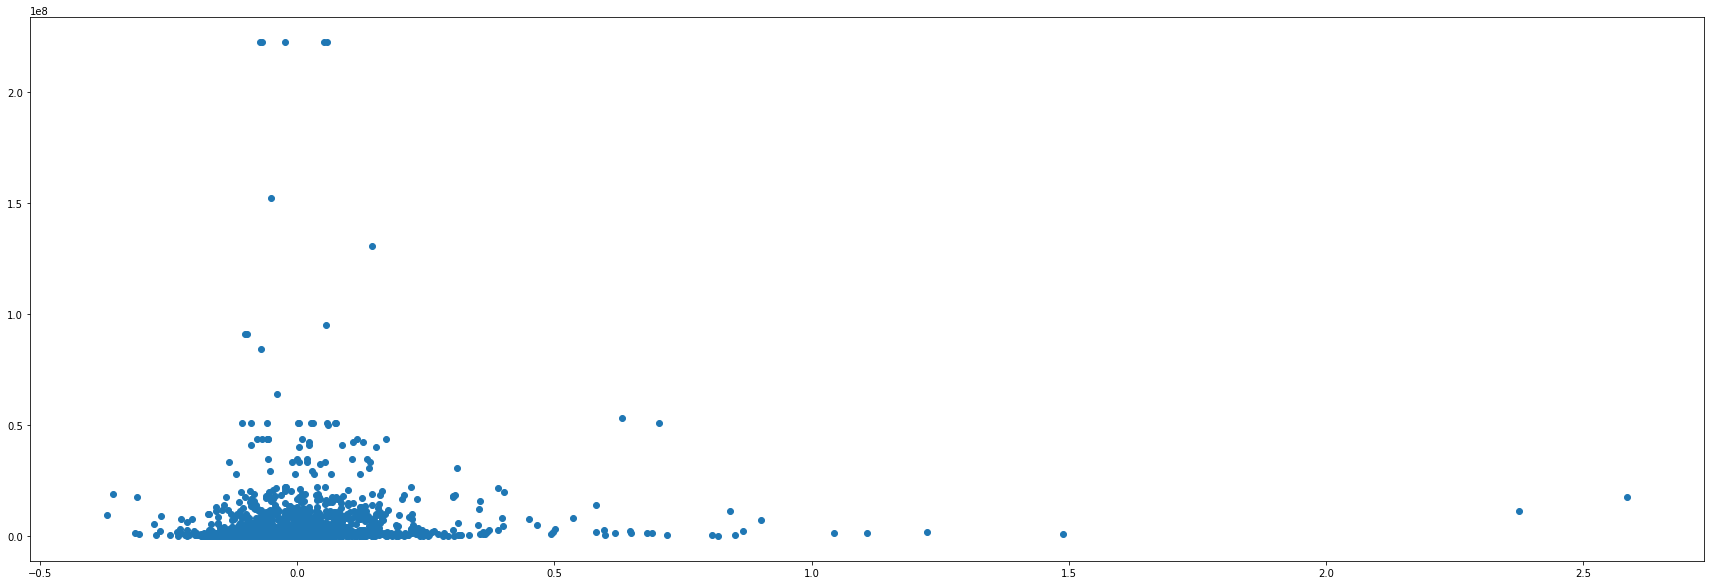

Total DataPoints: 2589
DataPoints Excluded: 0
Total Events: 1623


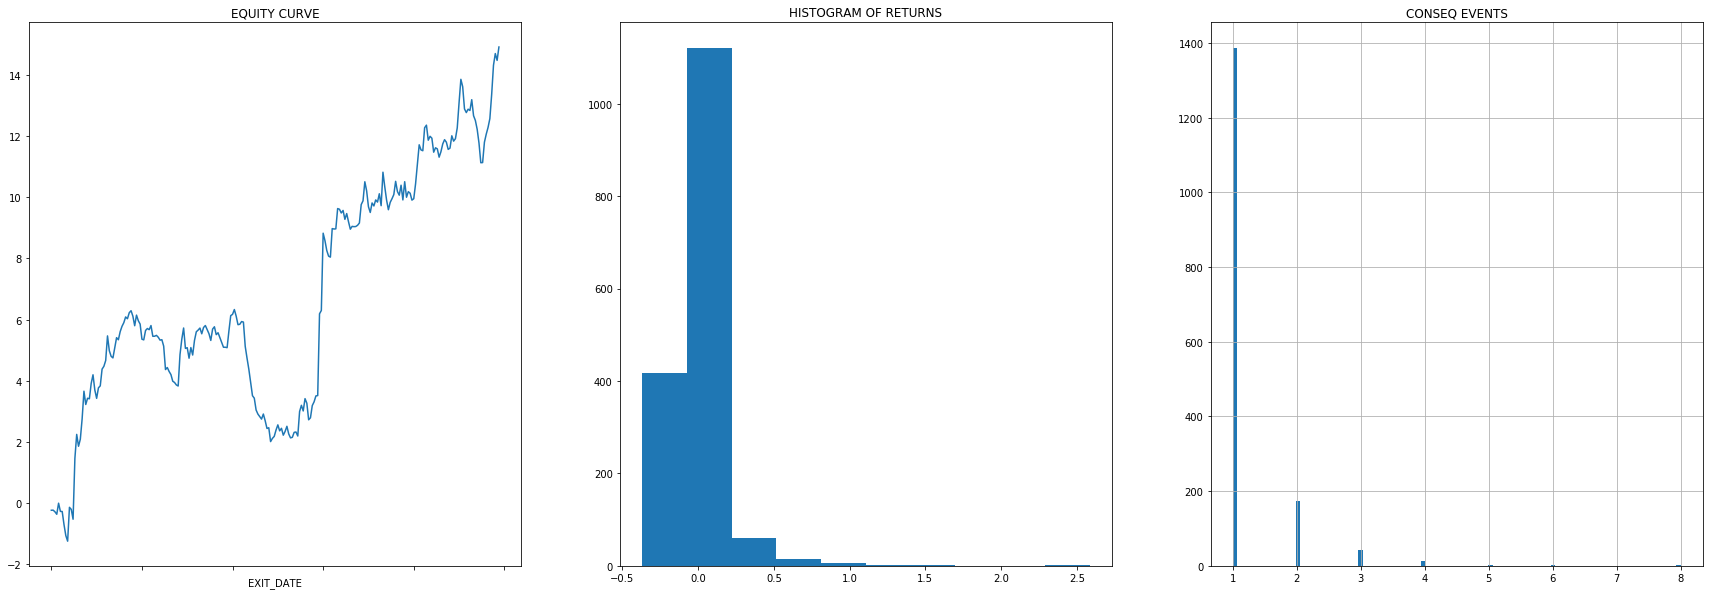

****************************************************************************************************
STDEV LIMIT TEST
LIMIT: 1
STDDEV: 0.16964821040265818
MEAN: 0.009185501959366932
EVENTS EXCLUDED: 121
Total Events: 1502


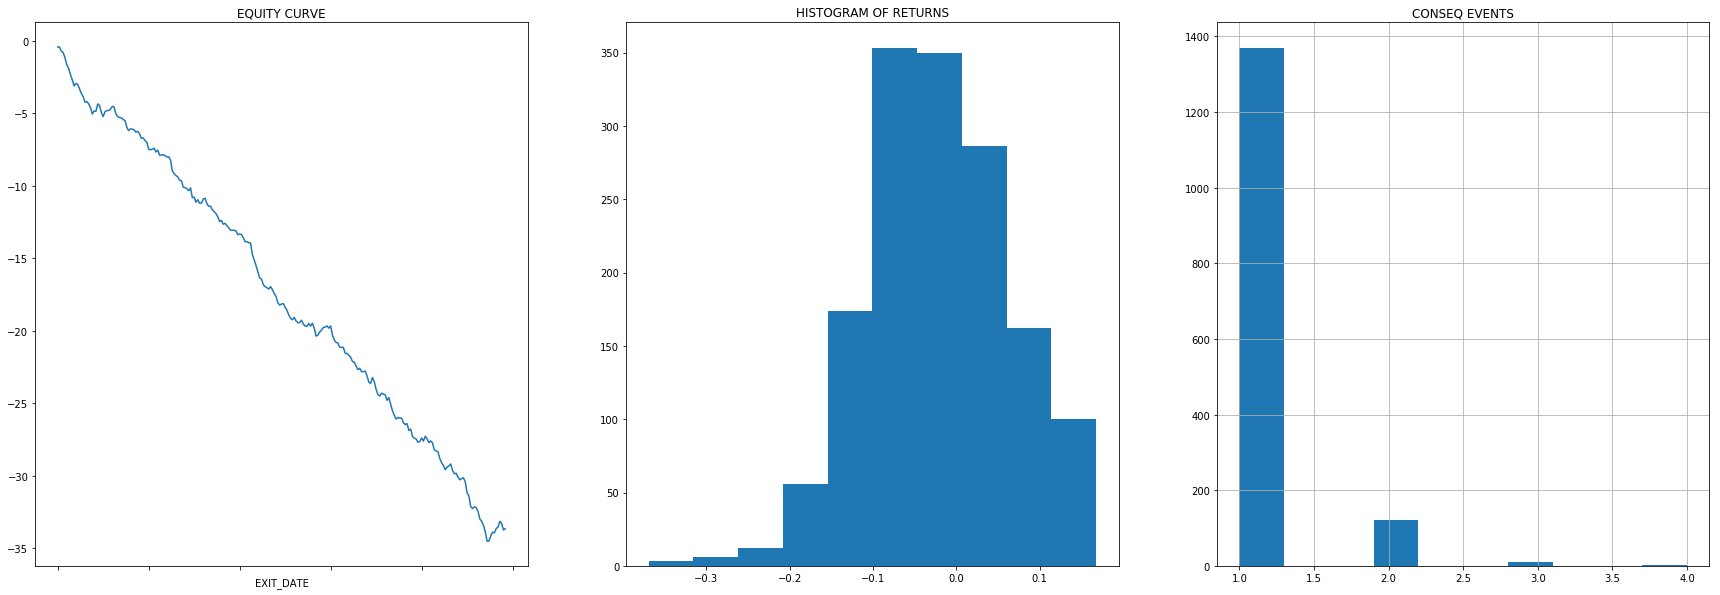

****************************************************************************************************
STDEV LIMIT TEST
LIMIT: 1.5
STDDEV: 0.16964821040265818
MEAN: 0.009185501959366932
EVENTS EXCLUDED: 63
Total Events: 1560


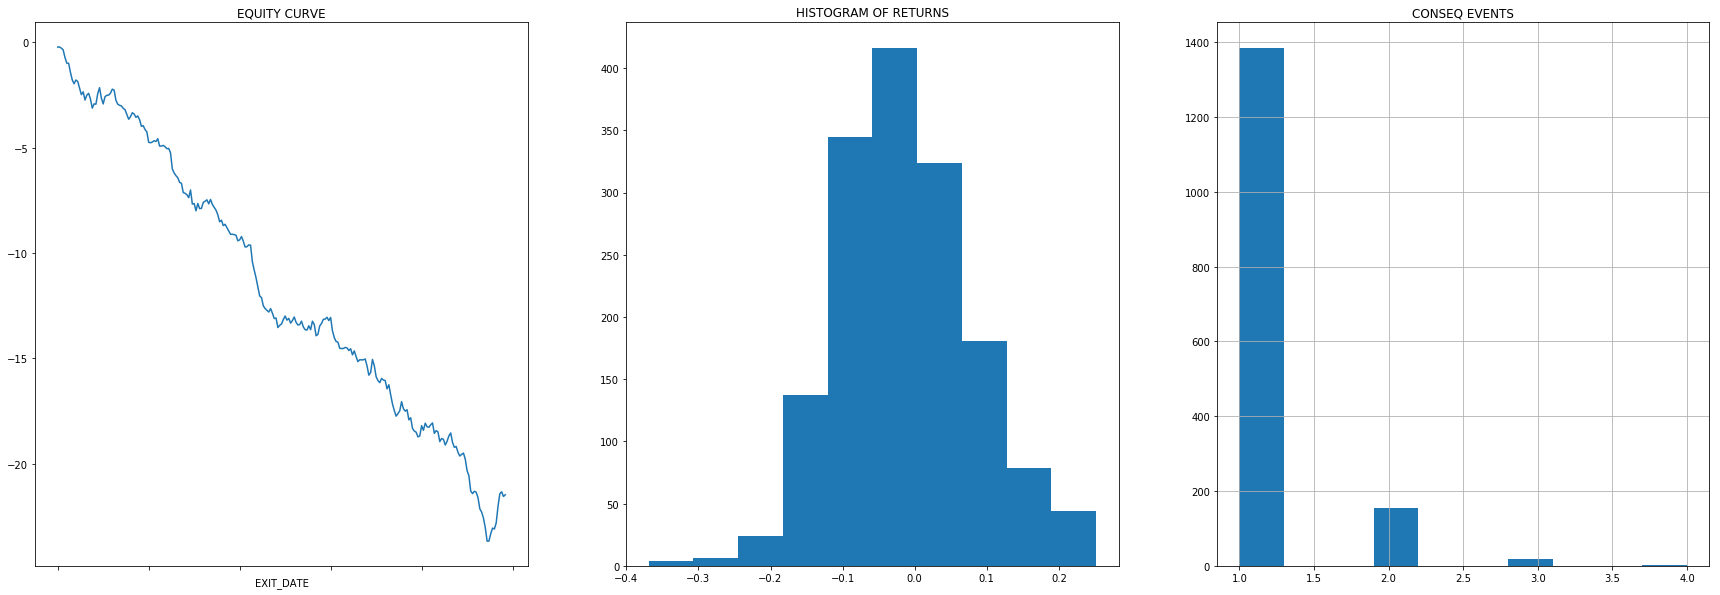

****************************************************************************************************
STDEV LIMIT TEST
LIMIT: 2
STDDEV: 0.16964821040265818
MEAN: 0.009185501959366932
EVENTS EXCLUDED: 44
Total Events: 1579


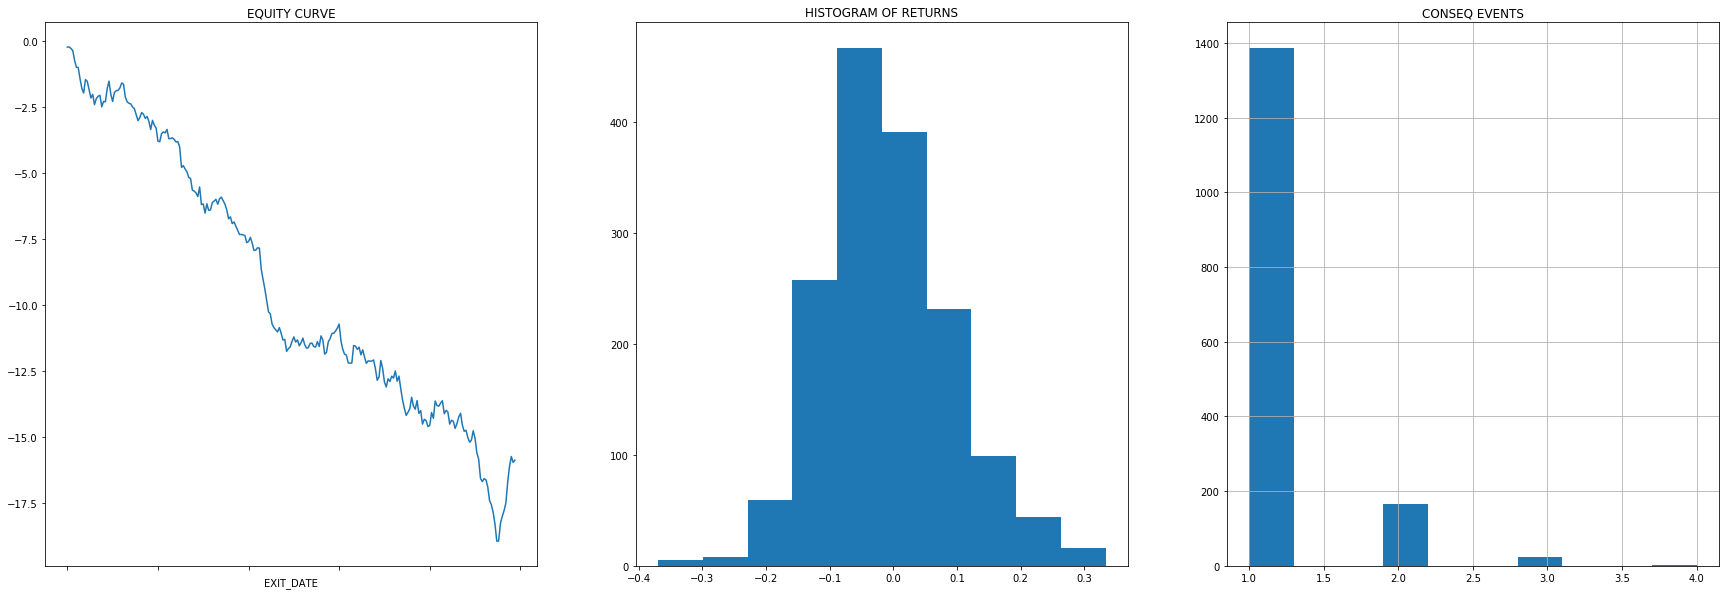

/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-
CONSEQ TEST
LIMIT: 1
STDDEV: 0.16964821040265818
MEAN: 0.009185501959366932
EVENTS EXCLUDED: 237
Total Events: 1386


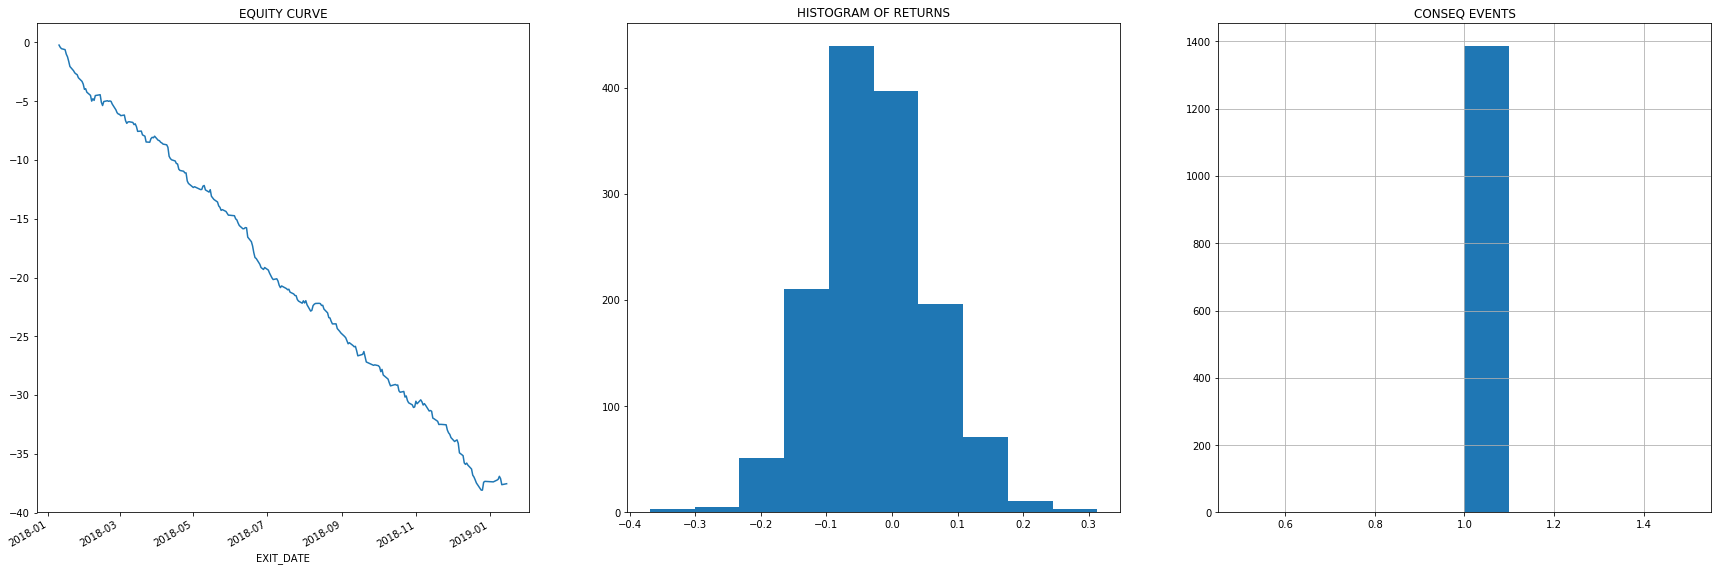

/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-
CONSEQ TEST
LIMIT: 2
STDDEV: 0.16964821040265818
MEAN: 0.009185501959366932
EVENTS EXCLUDED: 64
Total Events: 1559


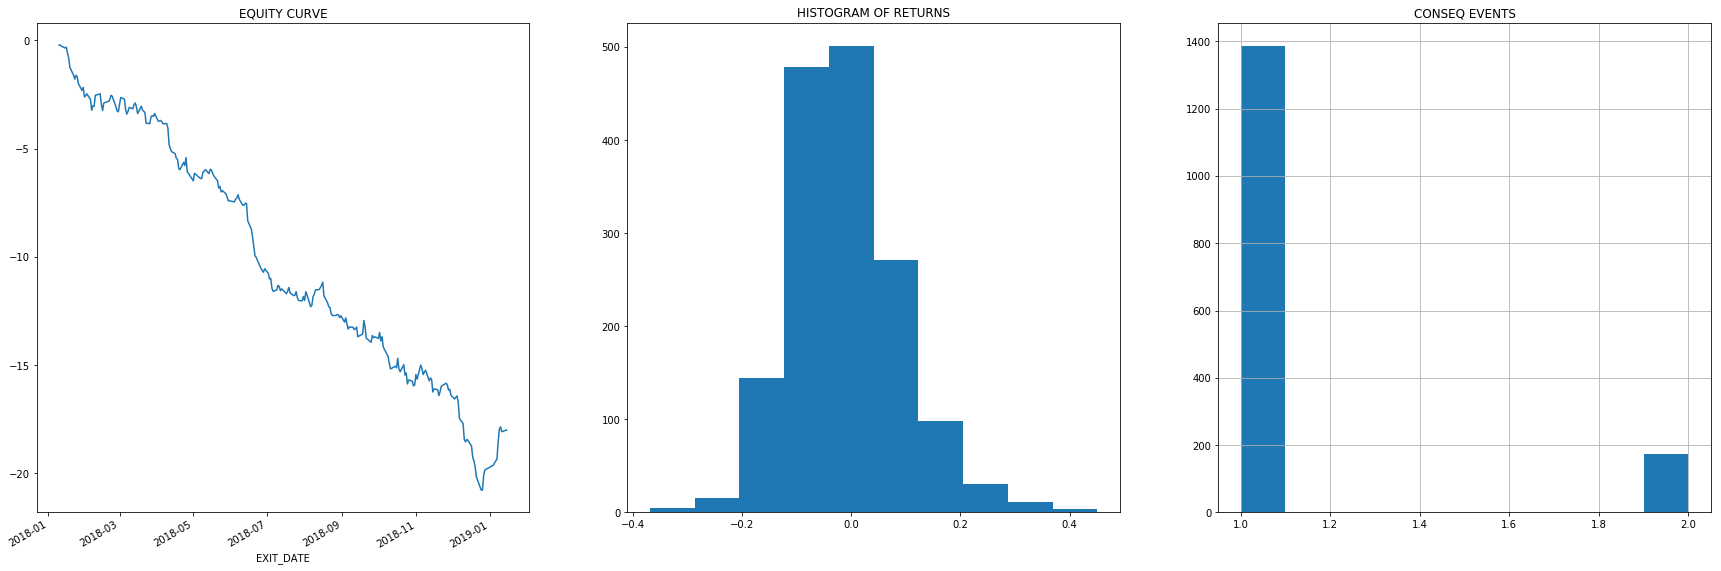

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
TYPE REVERSE False
VOLUME THOLD: 1000000
Total DataPoints: 2589
DataPoints Excluded: 922
Total Events: 983


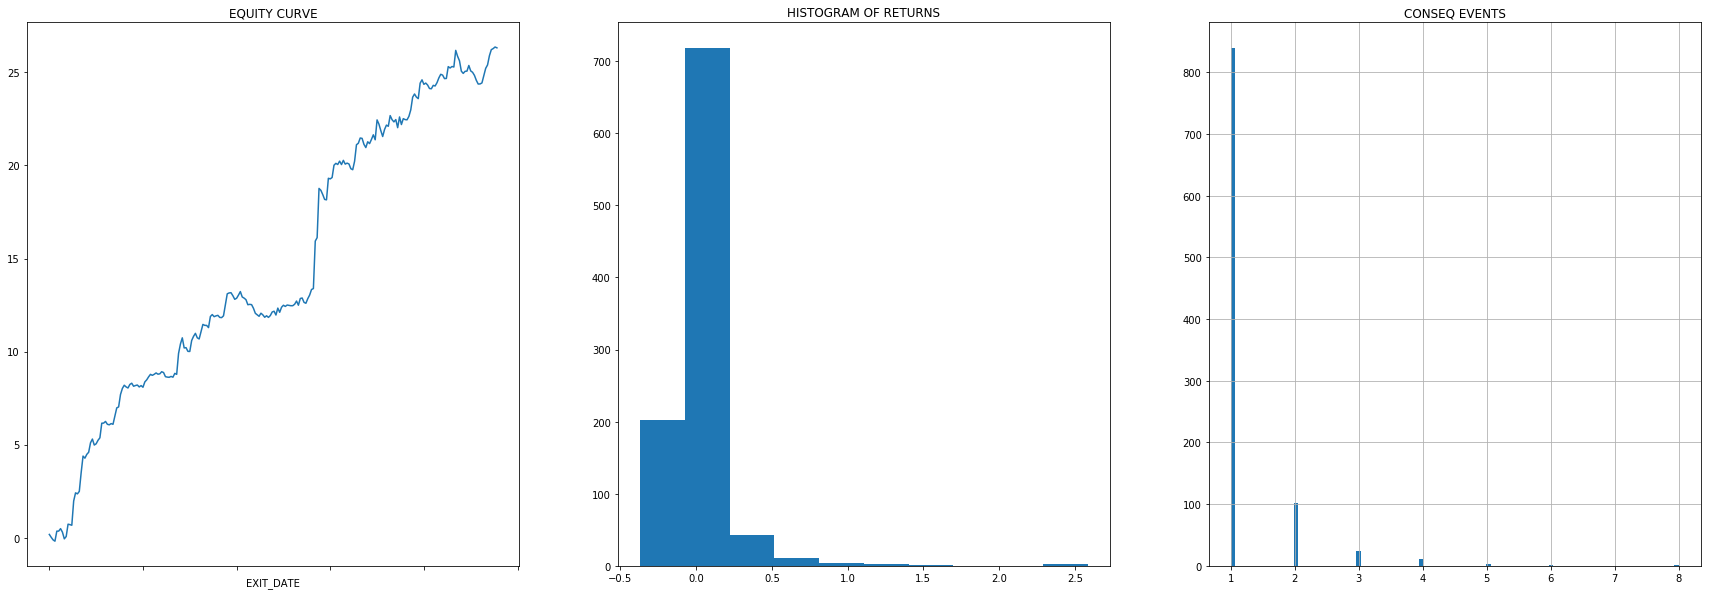

****************************************************************************************************
STDEV LIMIT TEST
LIMIT: 1
STDDEV: 0.19230947558513015
MEAN: 0.026777275465859313
EVENTS EXCLUDED: 76
Total Events: 907


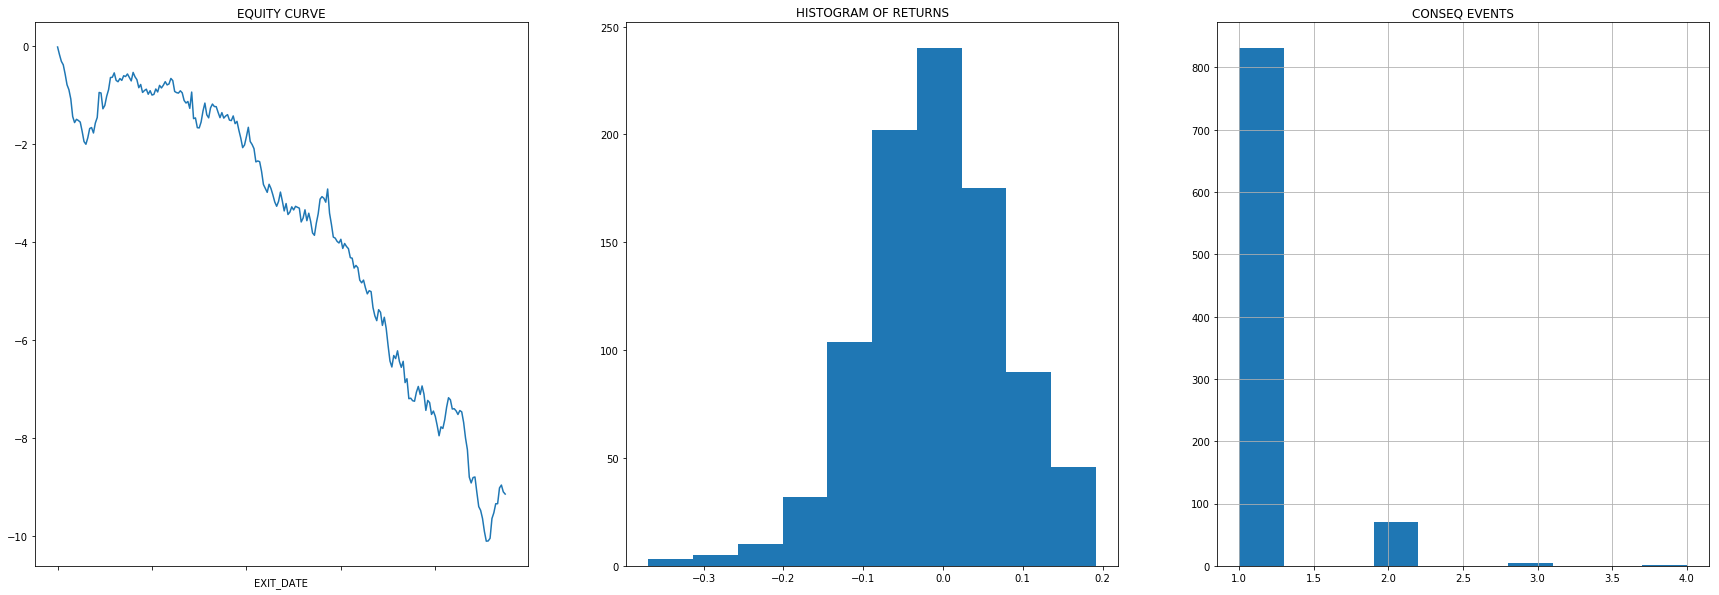

****************************************************************************************************
STDEV LIMIT TEST
LIMIT: 1.5
STDDEV: 0.19230947558513015
MEAN: 0.026777275465859313
EVENTS EXCLUDED: 42
Total Events: 941


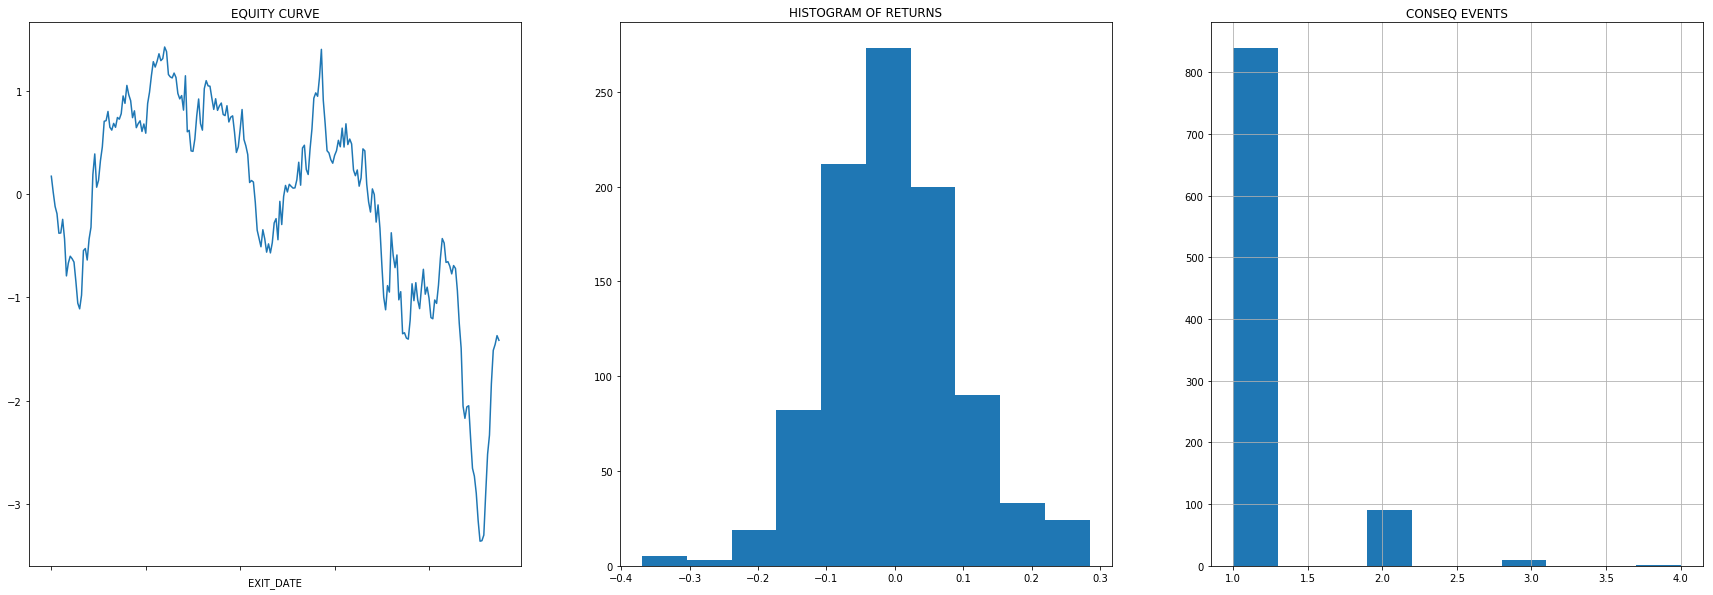

****************************************************************************************************
STDEV LIMIT TEST
LIMIT: 2
STDDEV: 0.19230947558513015
MEAN: 0.026777275465859313
EVENTS EXCLUDED: 30
Total Events: 953


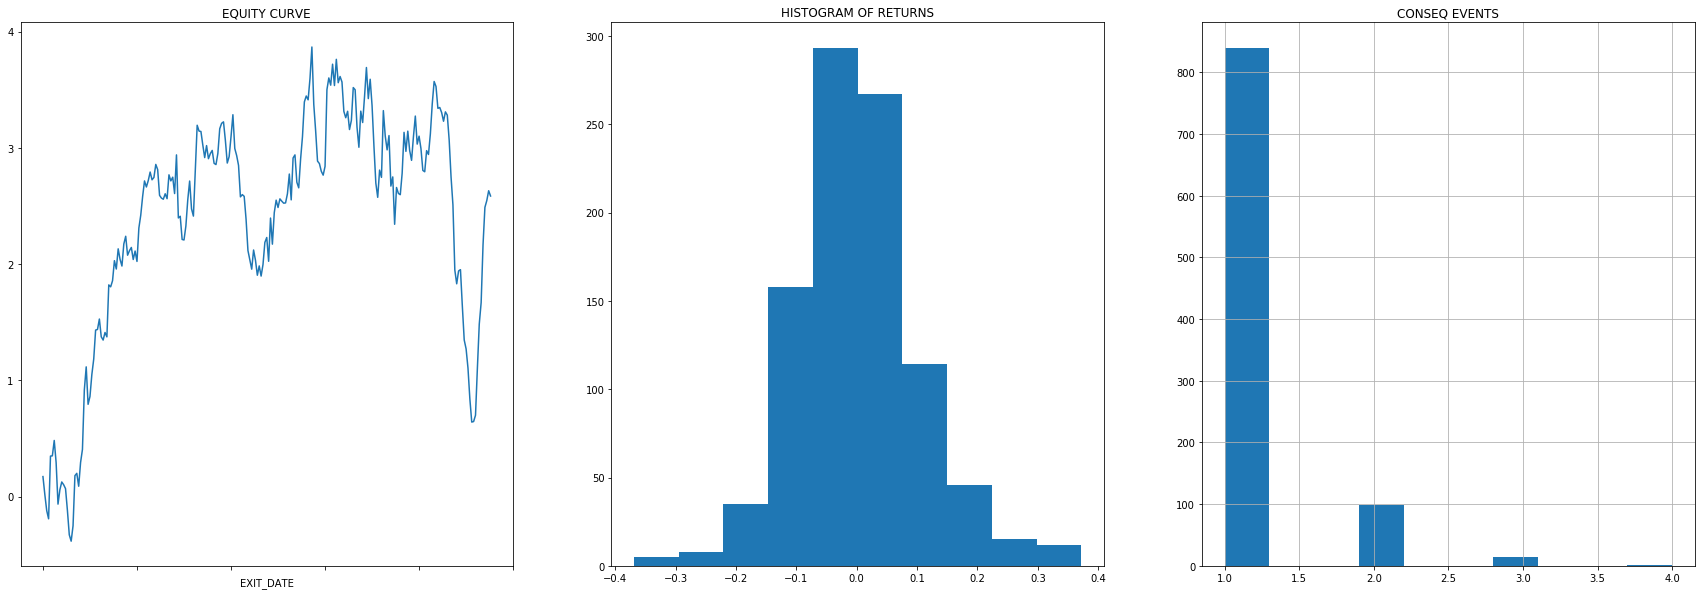

/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-
CONSEQ TEST
LIMIT: 1
STDDEV: 0.19230947558513015
MEAN: 0.026777275465859313
EVENTS EXCLUDED: 144
Total Events: 839


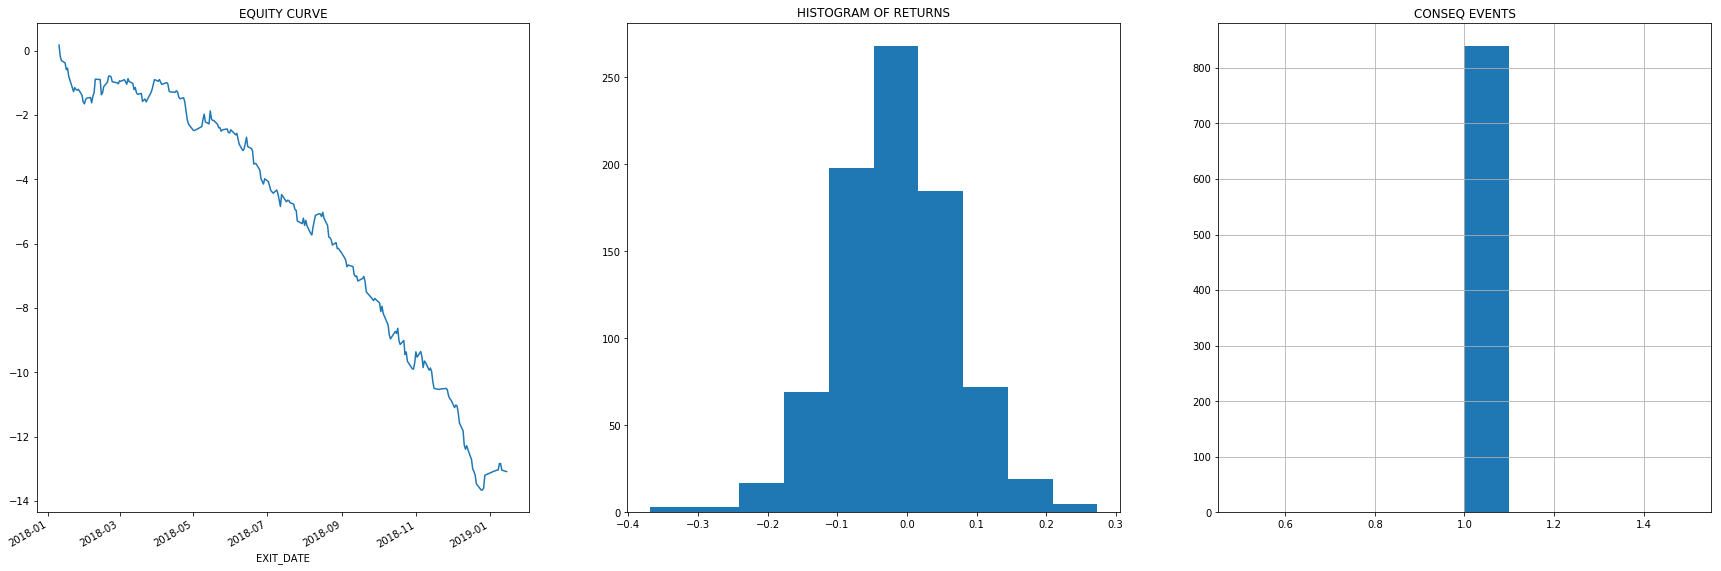

/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-
CONSEQ TEST
LIMIT: 2
STDDEV: 0.19230947558513015
MEAN: 0.026777275465859313
EVENTS EXCLUDED: 42
Total Events: 941


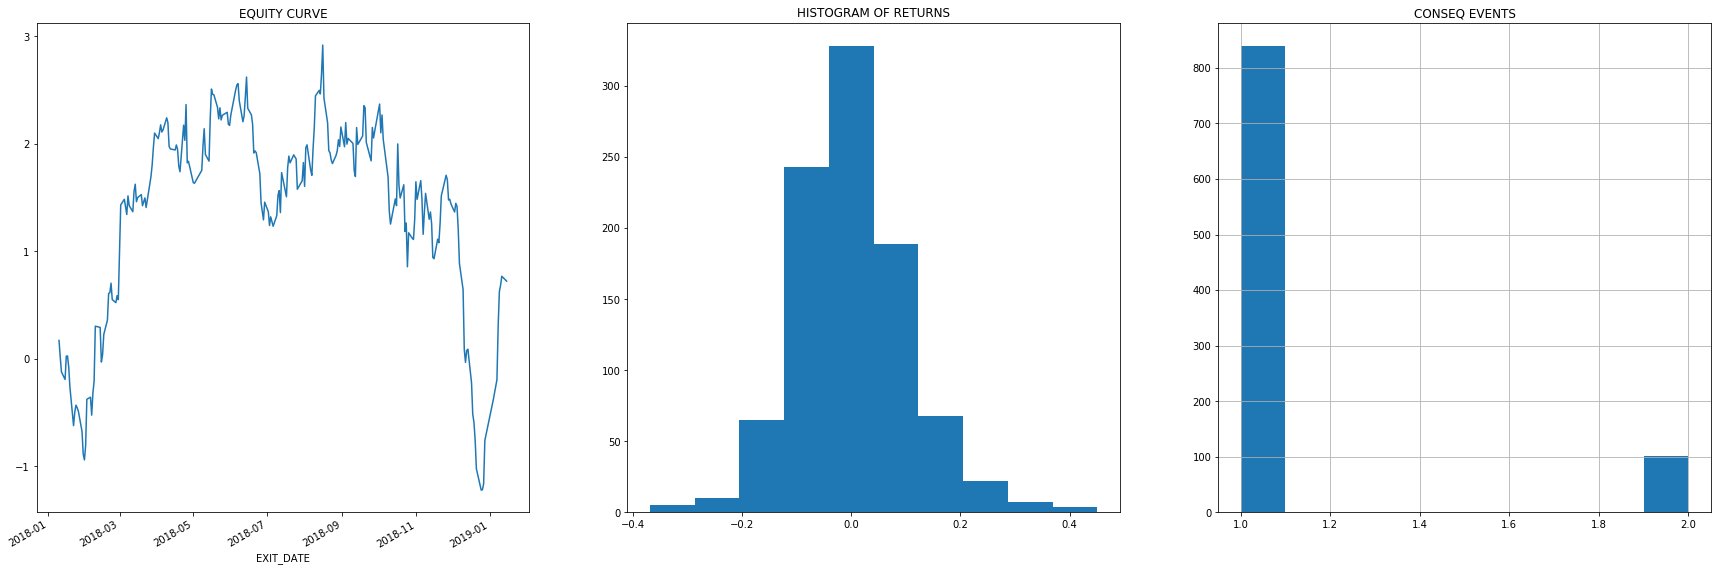

TYPE REVERSE True
VOLUME THOLD: 1000000
Total DataPoints: 2589
DataPoints Excluded: 1667
Total Events: 640


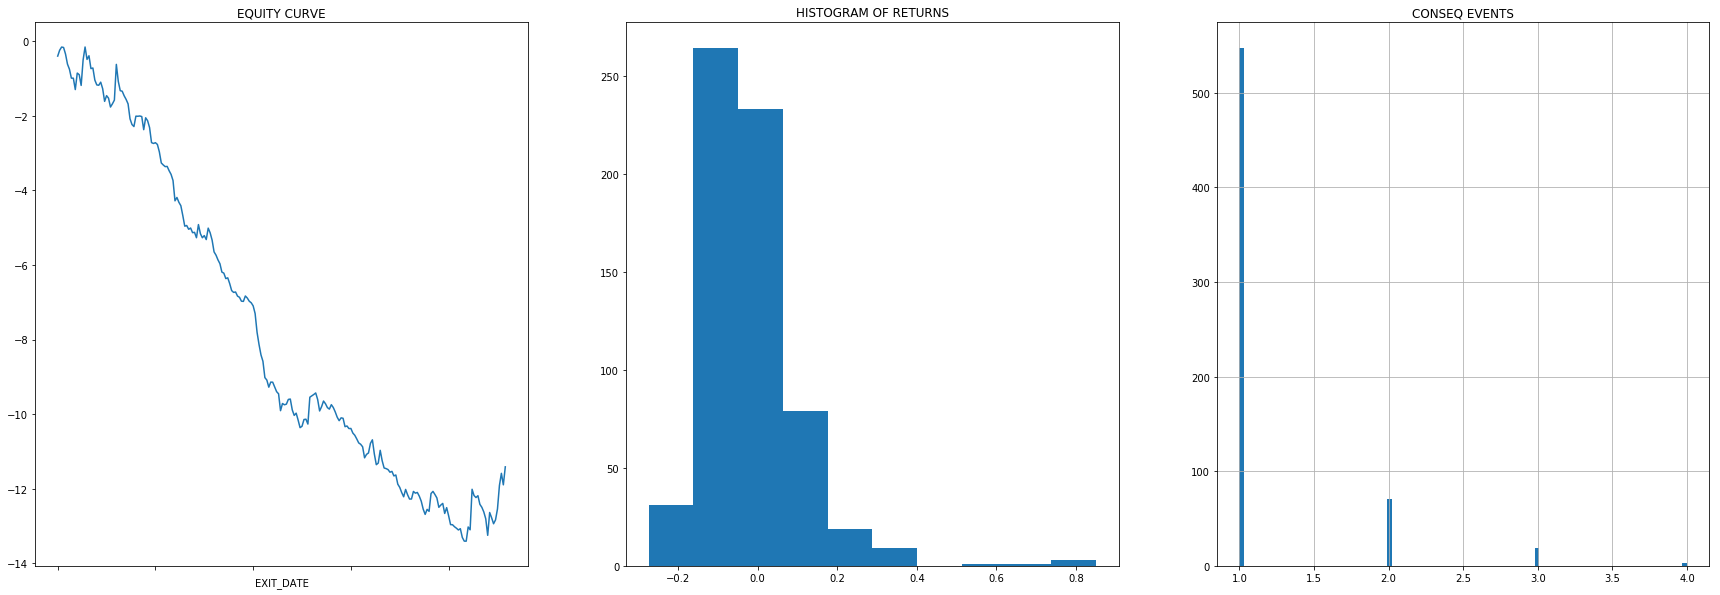

****************************************************************************************************
STDEV LIMIT TEST
LIMIT: 1
STDDEV: 0.12252749015316135
MEAN: -0.01783436266076121
EVENTS EXCLUDED: 86
Total Events: 554


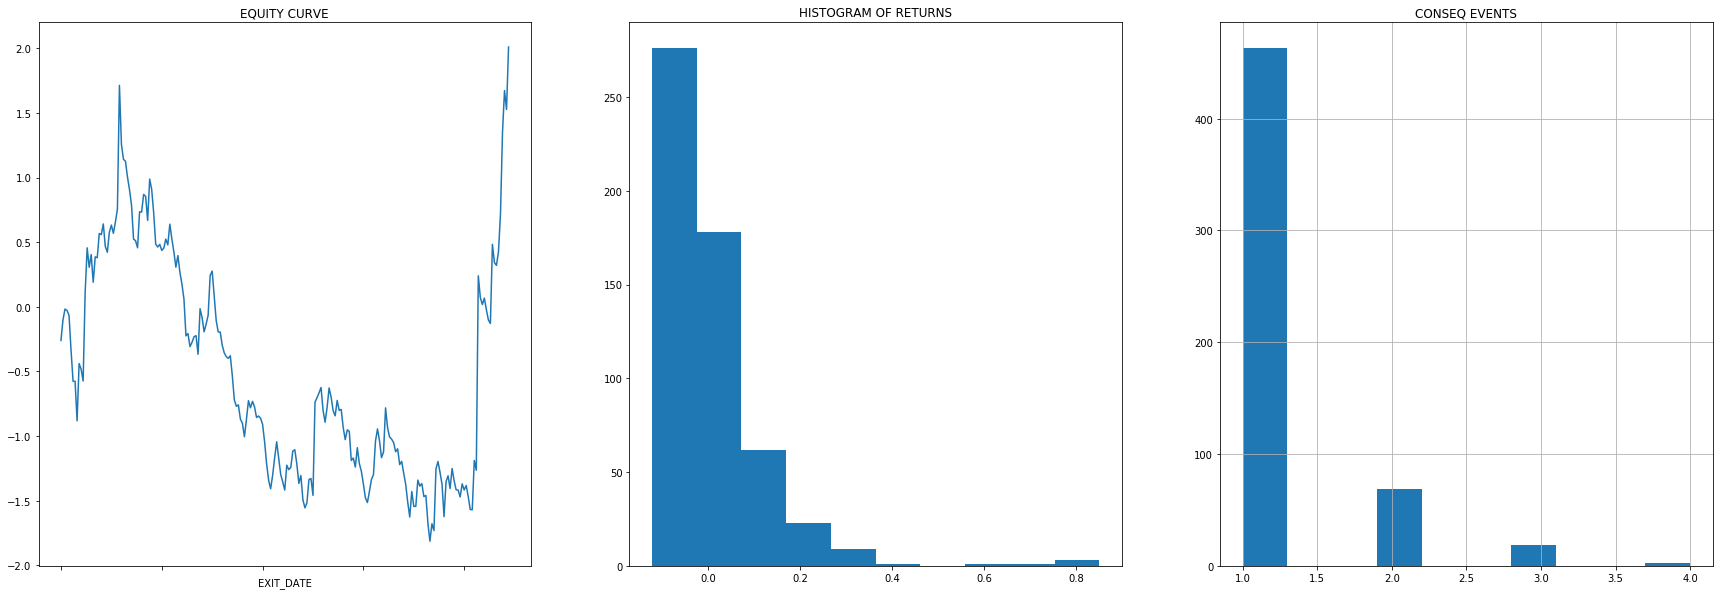

****************************************************************************************************
STDEV LIMIT TEST
LIMIT: 1.5
STDDEV: 0.12252749015316135
MEAN: -0.01783436266076121
EVENTS EXCLUDED: 11
Total Events: 629


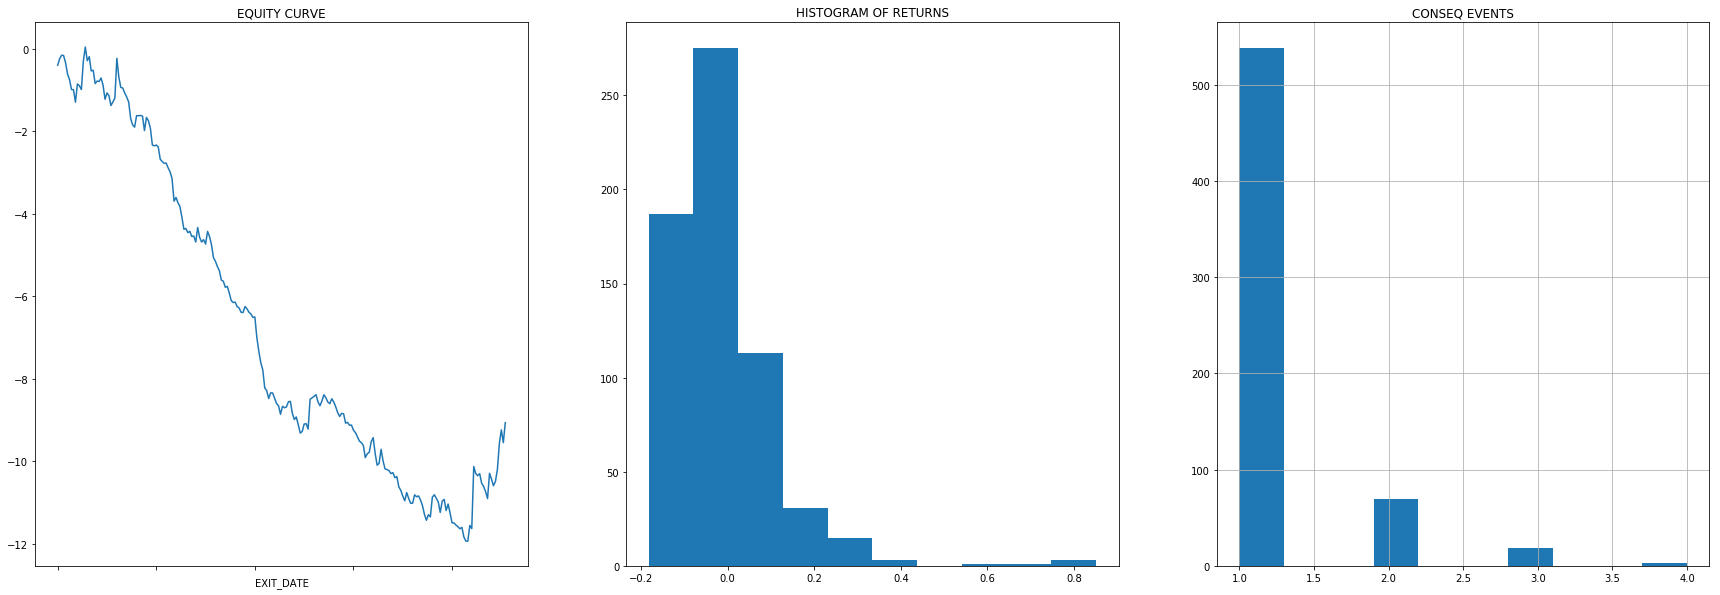

****************************************************************************************************
STDEV LIMIT TEST
LIMIT: 2
STDDEV: 0.12252749015316135
MEAN: -0.01783436266076121
EVENTS EXCLUDED: 2
Total Events: 638


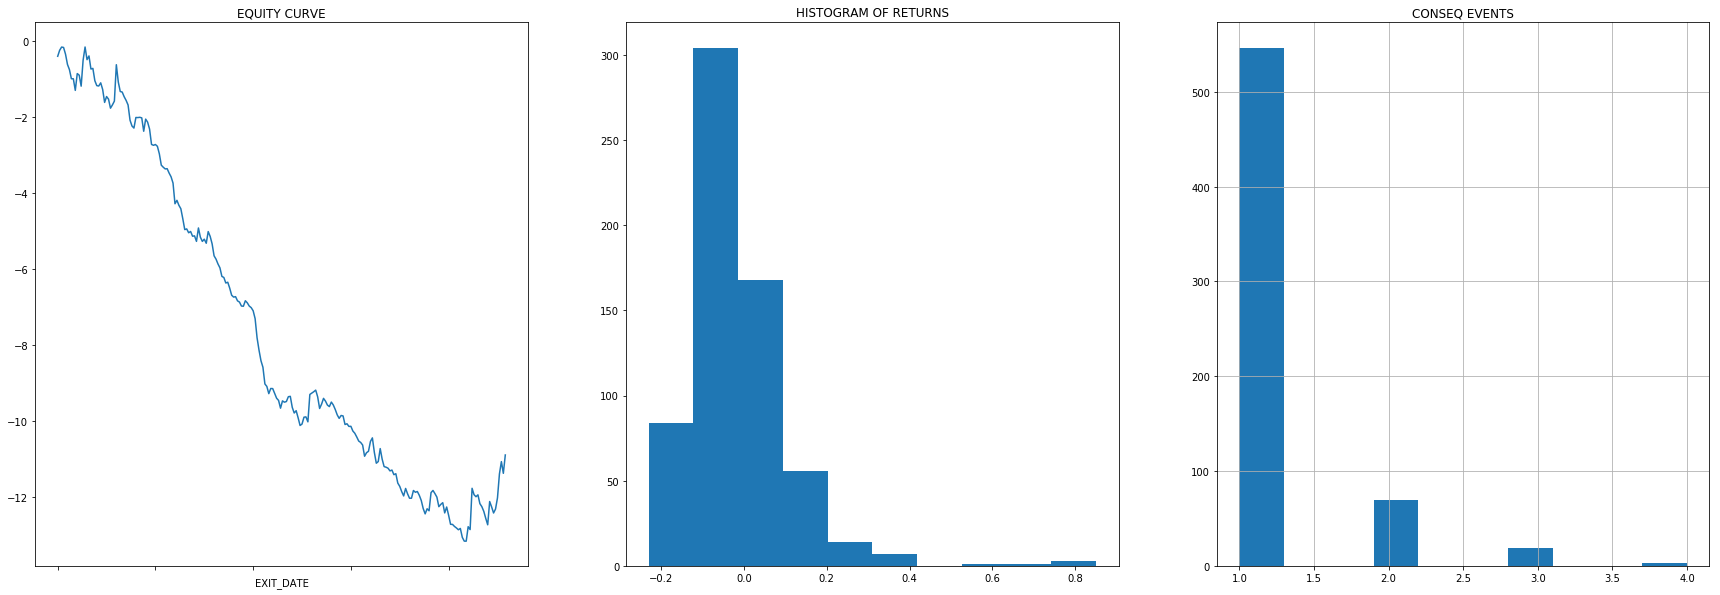

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
TYPE REVERSE False
VOLUME THOLD: 5000000
Total DataPoints: 2589
DataPoints Excluded: 1828
Total Events: 434


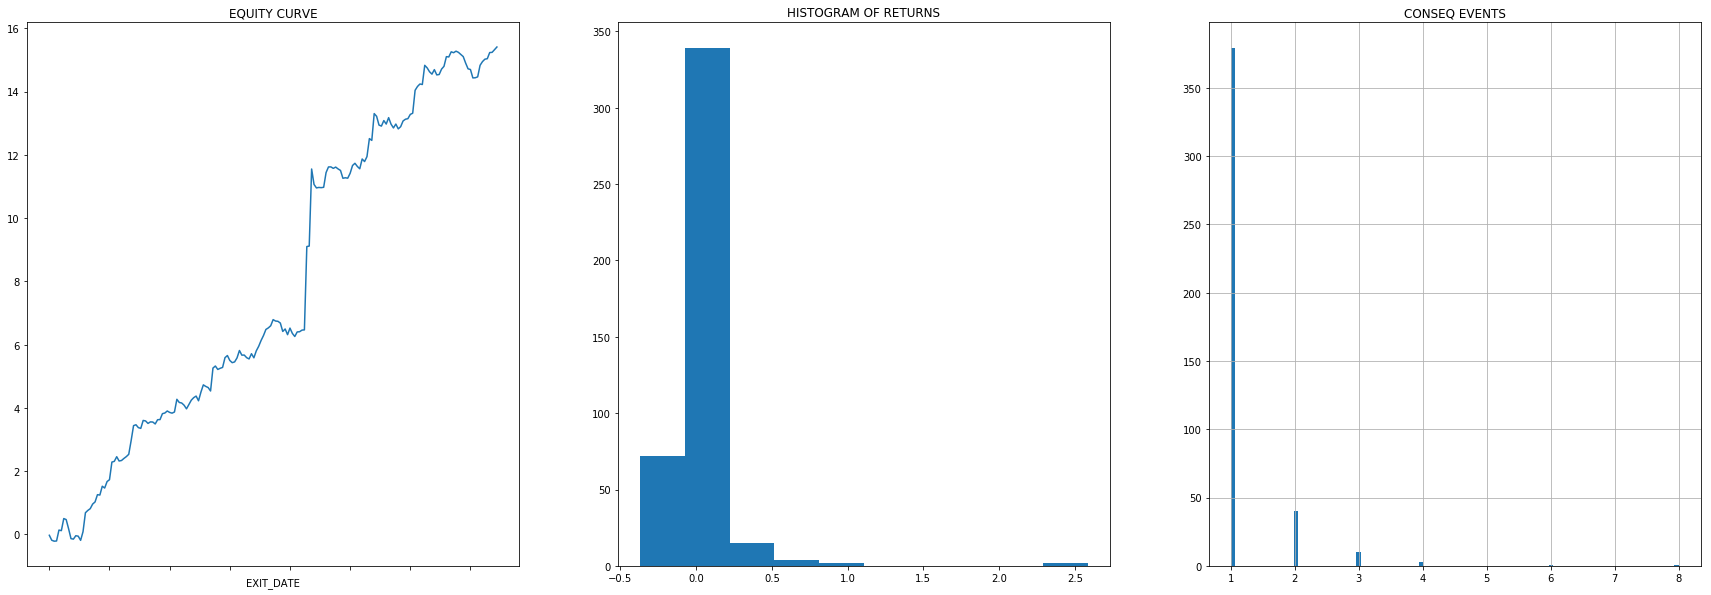

****************************************************************************************************
STDEV LIMIT TEST
LIMIT: 1
STDDEV: 0.2138252049926906
MEAN: 0.035501784685757244
EVENTS EXCLUDED: 25
Total Events: 409


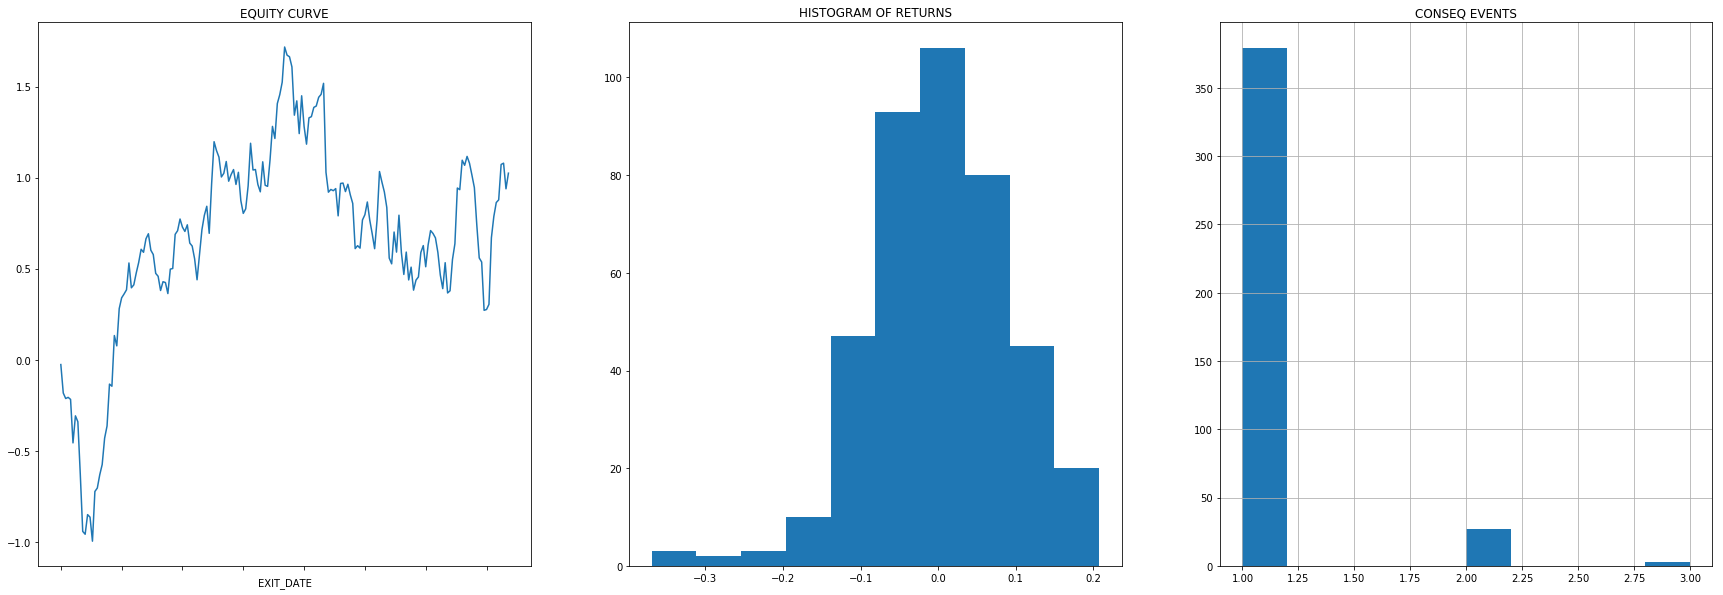

****************************************************************************************************
STDEV LIMIT TEST
LIMIT: 1.5
STDDEV: 0.2138252049926906
MEAN: 0.035501784685757244
EVENTS EXCLUDED: 14
Total Events: 420


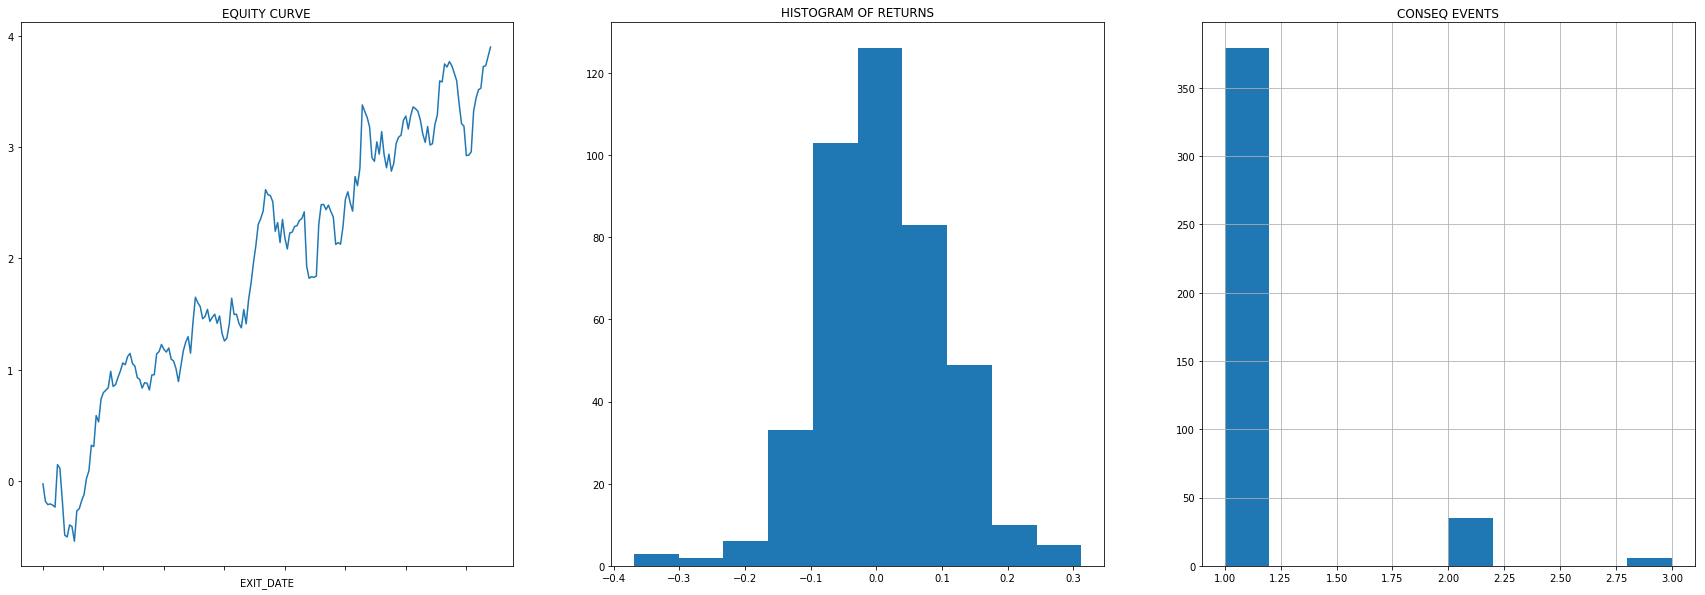

****************************************************************************************************
STDEV LIMIT TEST
LIMIT: 2
STDDEV: 0.2138252049926906
MEAN: 0.035501784685757244
EVENTS EXCLUDED: 9
Total Events: 425


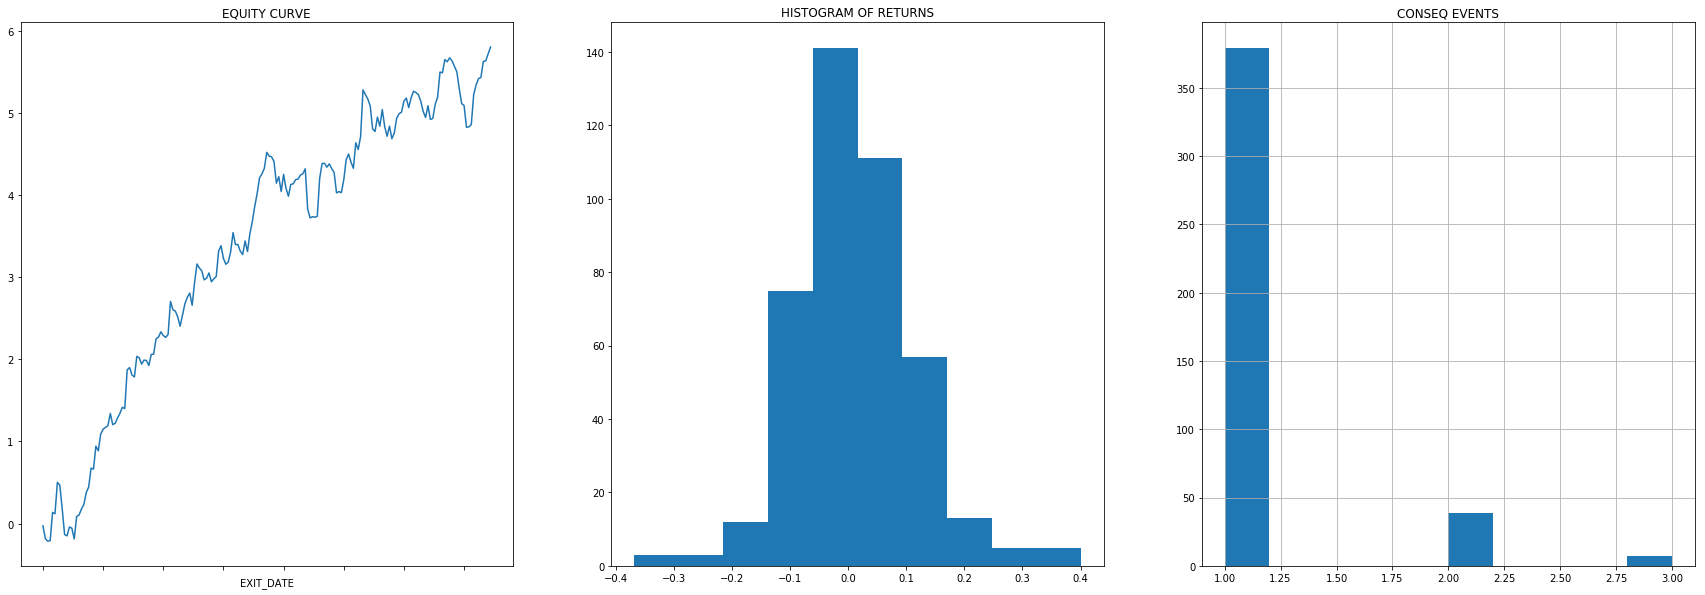

/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-
CONSEQ TEST
LIMIT: 1
STDDEV: 0.2138252049926906
MEAN: 0.035501784685757244
EVENTS EXCLUDED: 55
Total Events: 379


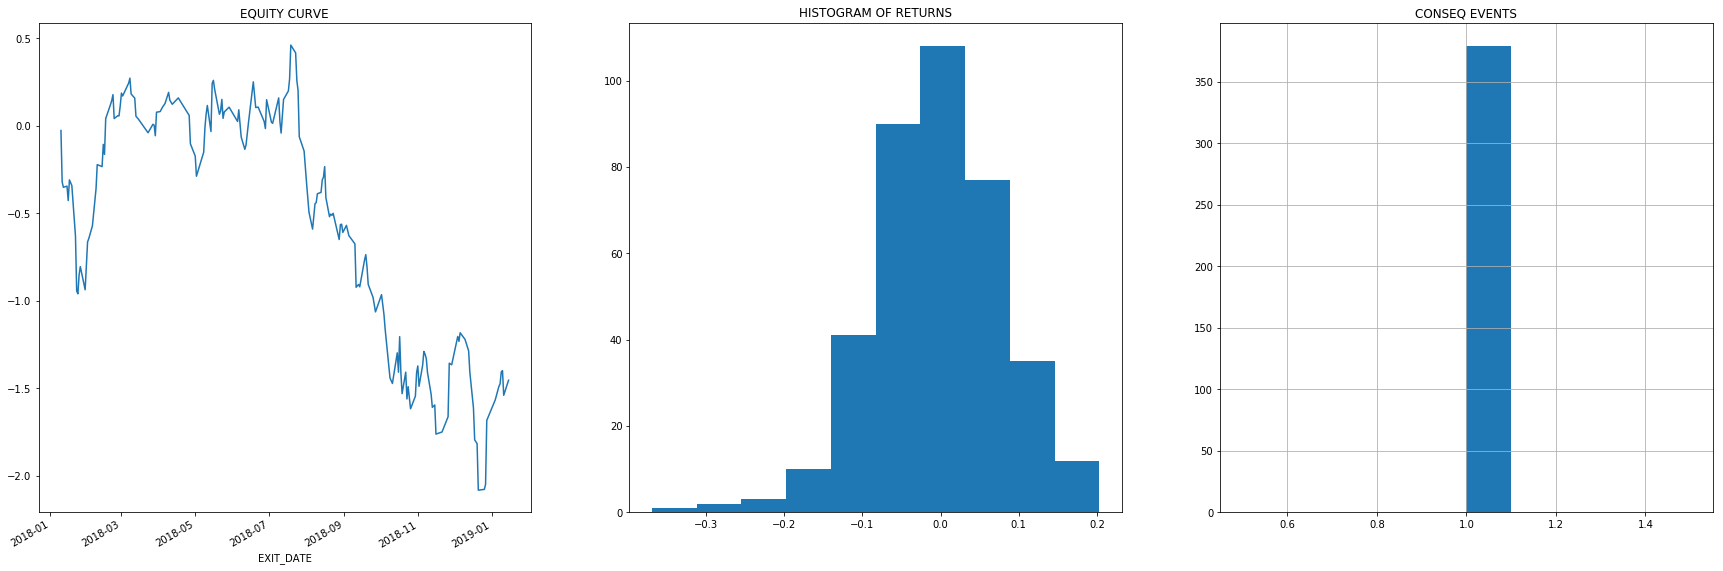

/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-
CONSEQ TEST
LIMIT: 2
STDDEV: 0.2138252049926906
MEAN: 0.035501784685757244
EVENTS EXCLUDED: 15
Total Events: 419


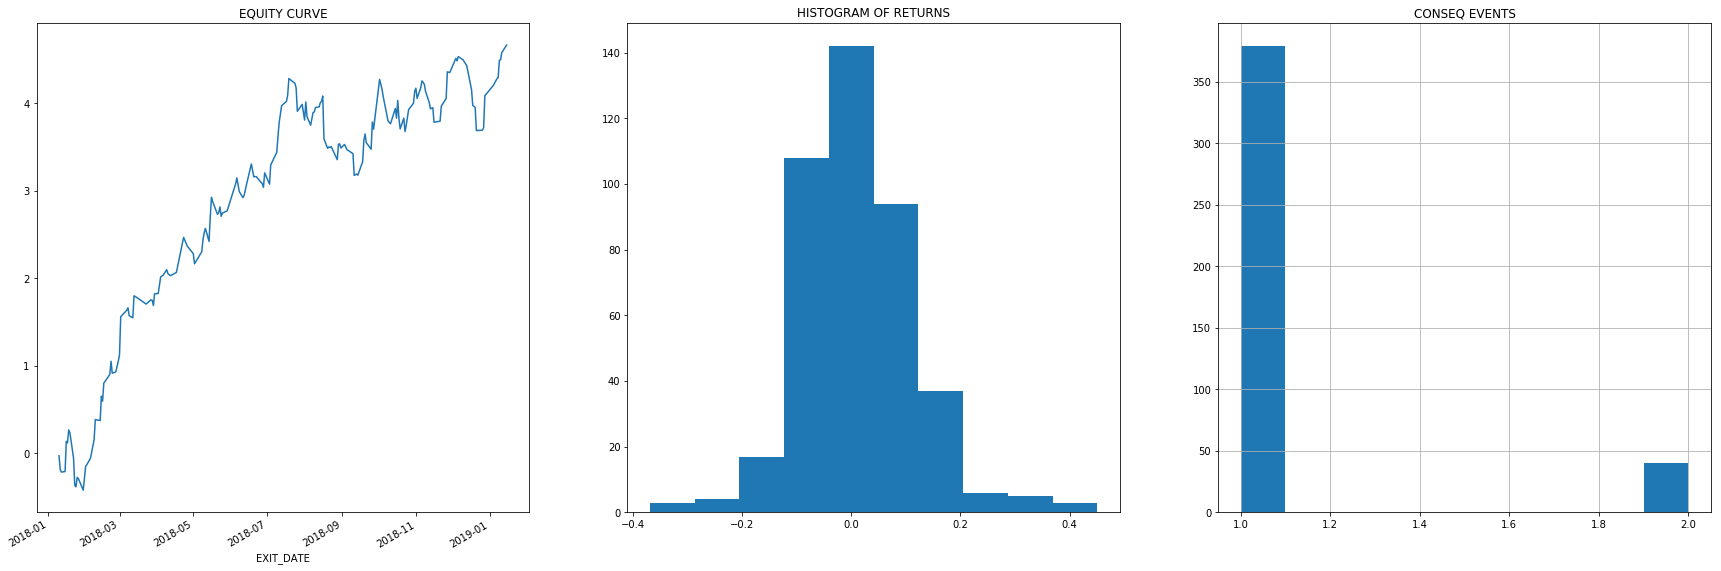

TYPE REVERSE True
VOLUME THOLD: 5000000
Total DataPoints: 2589
DataPoints Excluded: 761
Total Events: 1189


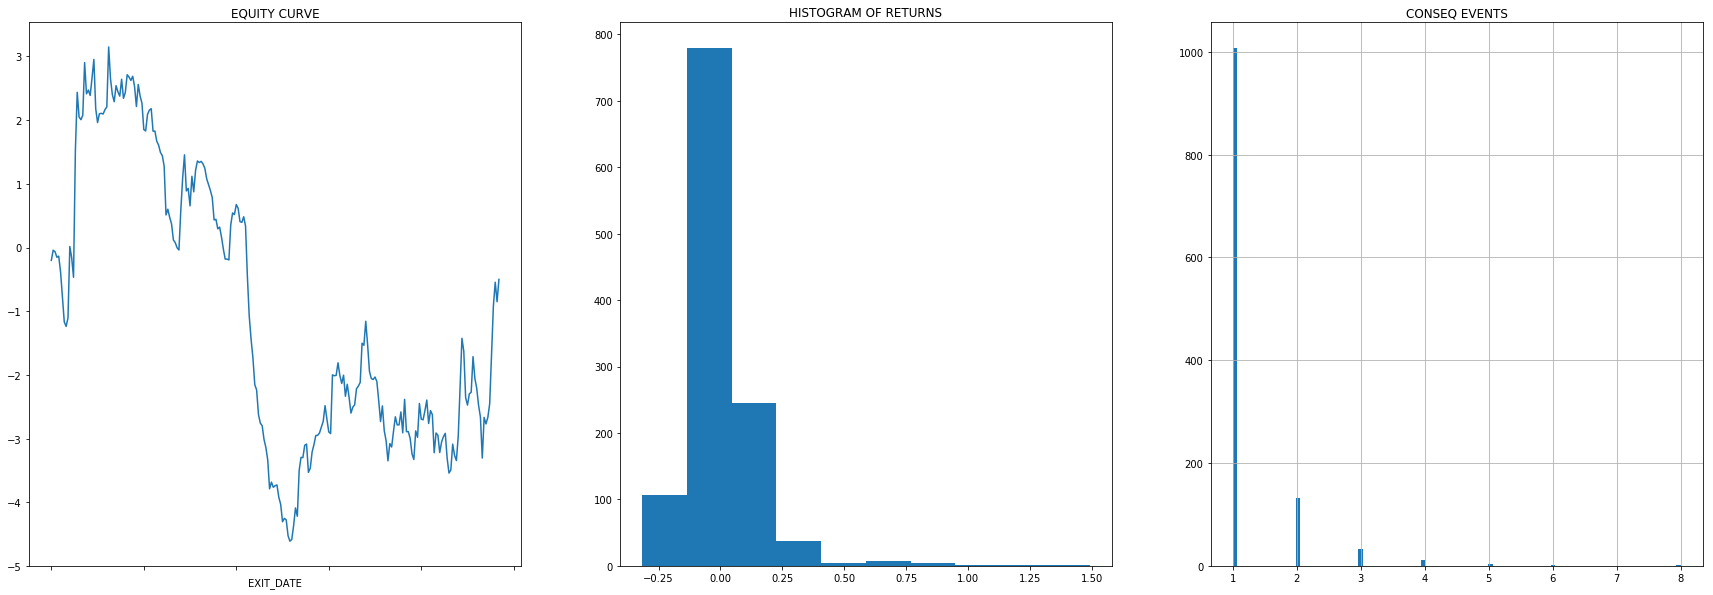

****************************************************************************************************
STDEV LIMIT TEST
LIMIT: 1
STDDEV: 0.1492811982893825
MEAN: -0.0004202732326039648
EVENTS EXCLUDED: 69
Total Events: 1120


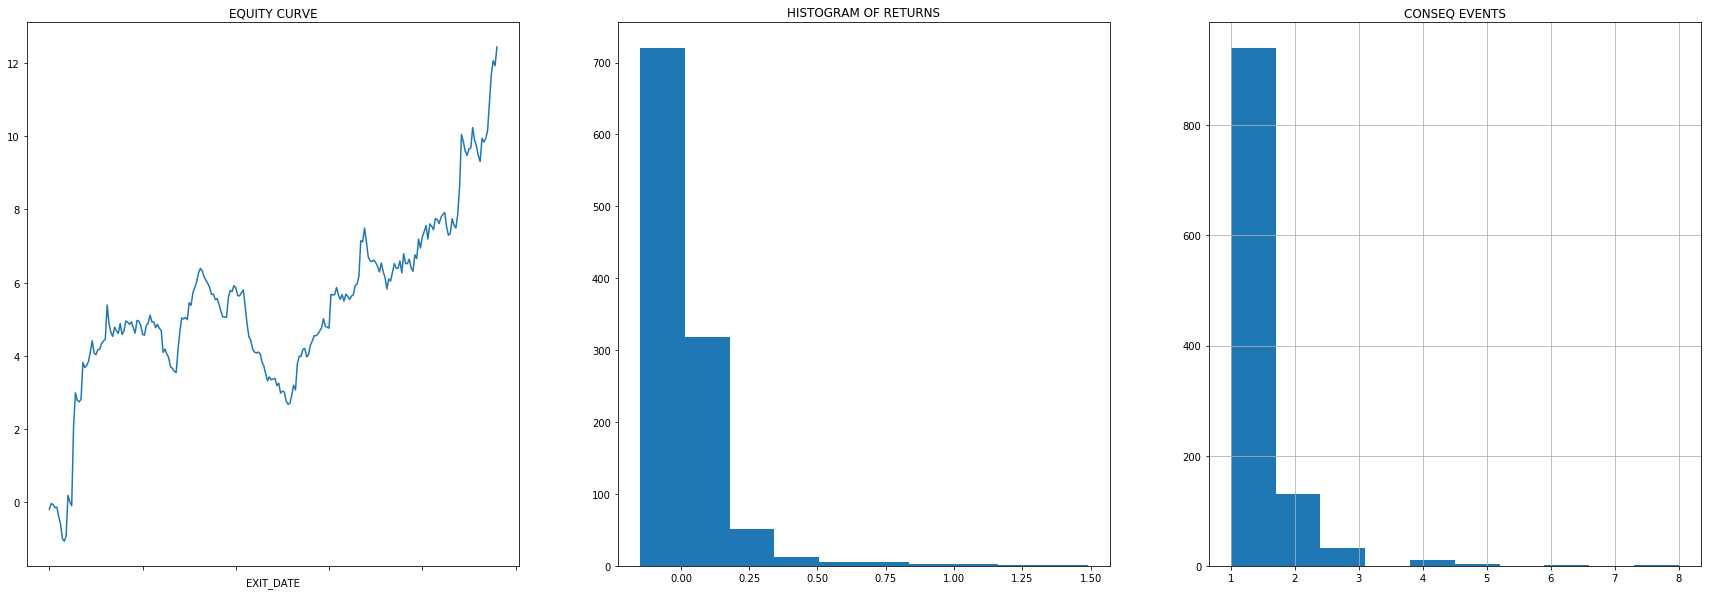

****************************************************************************************************
STDEV LIMIT TEST
LIMIT: 1.5
STDDEV: 0.1492811982893825
MEAN: -0.0004202732326039648
EVENTS EXCLUDED: 10
Total Events: 1179


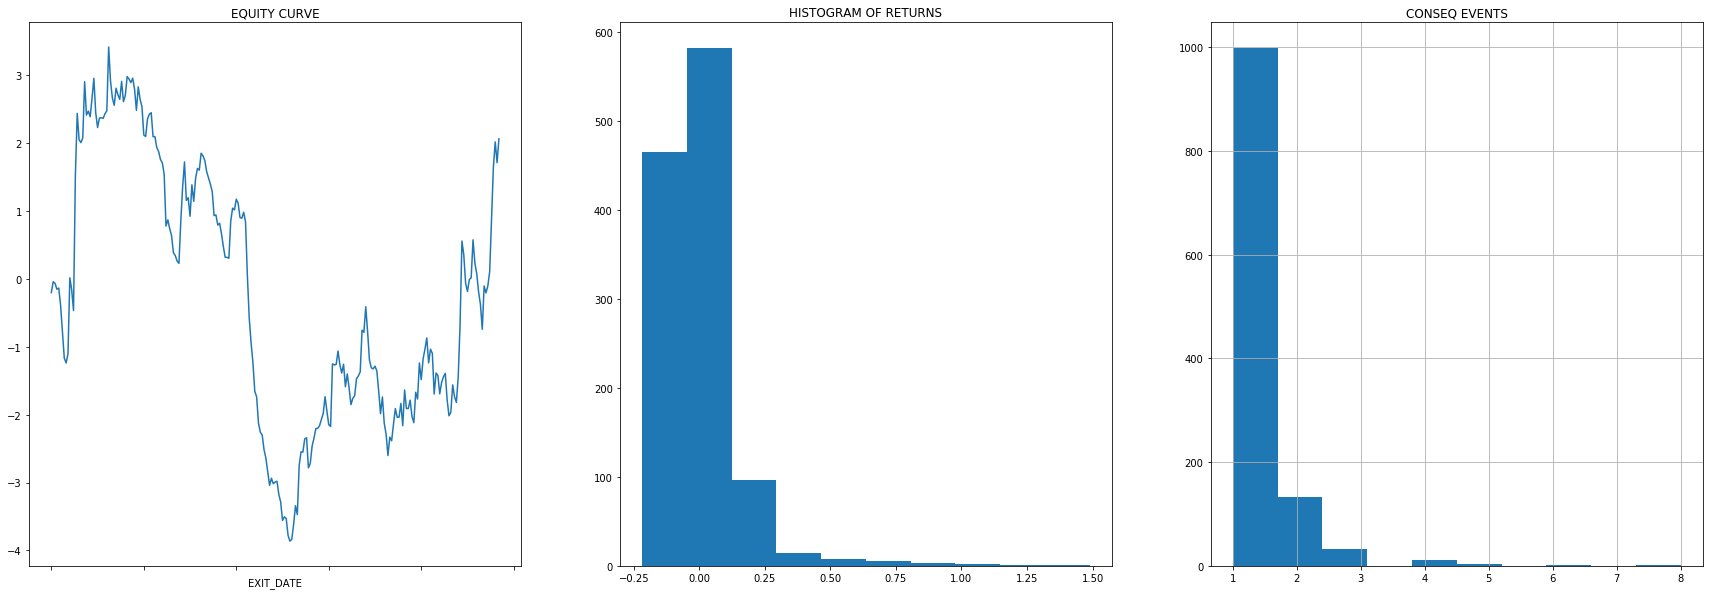

****************************************************************************************************
STDEV LIMIT TEST
LIMIT: 2
STDDEV: 0.1492811982893825
MEAN: -0.0004202732326039648
EVENTS EXCLUDED: 2
Total Events: 1187


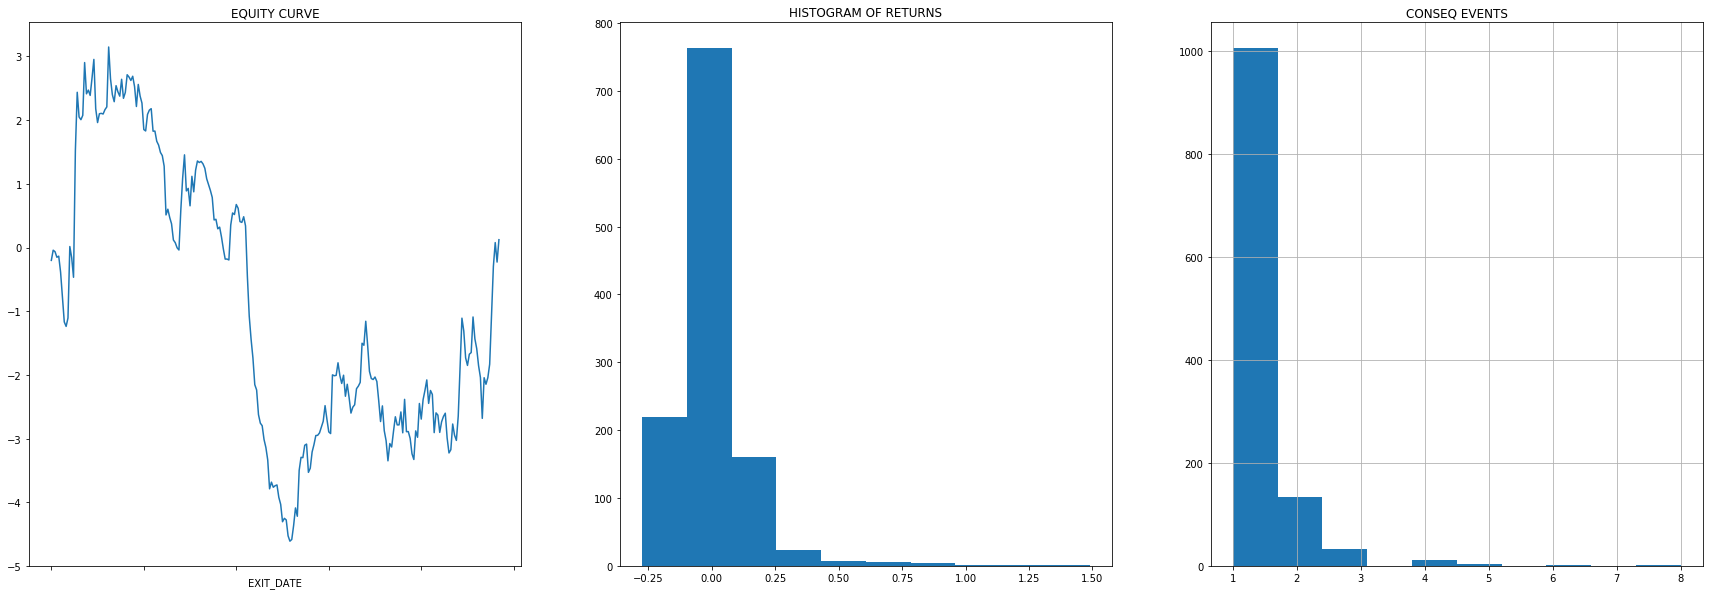

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
TYPE REVERSE False
VOLUME THOLD: 10000000
Total DataPoints: 2589
DataPoints Excluded: 2184
Total Events: 220


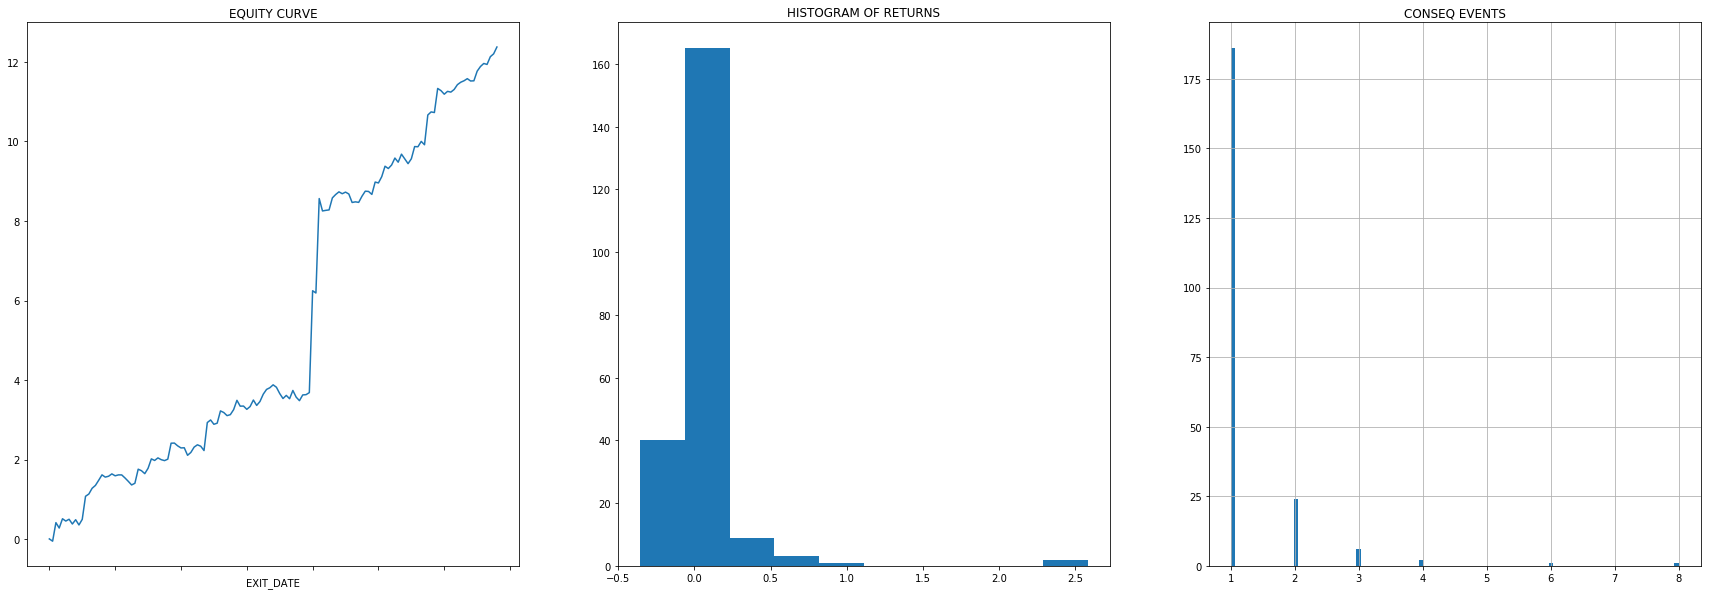

****************************************************************************************************
STDEV LIMIT TEST
LIMIT: 1
STDDEV: 0.2719879397136358
MEAN: 0.05625564297185177
EVENTS EXCLUDED: 14
Total Events: 206


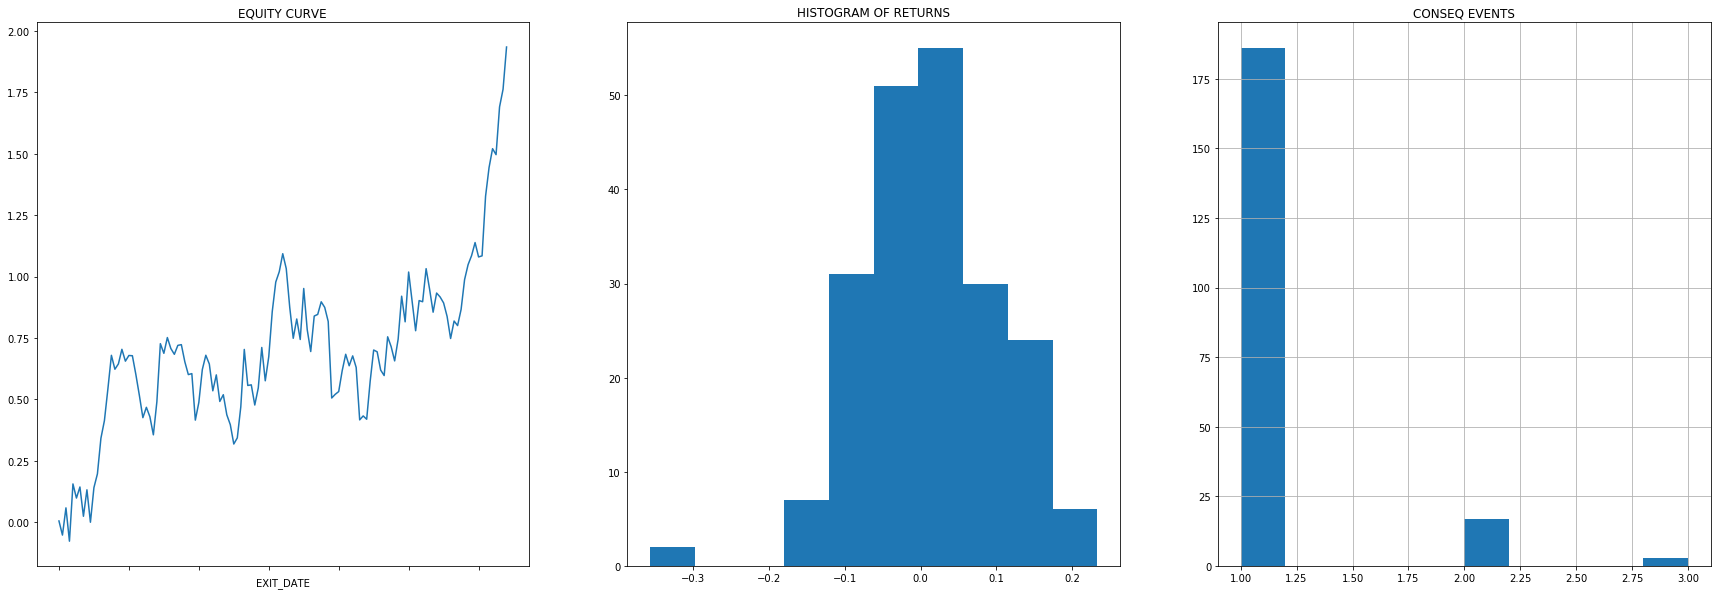

****************************************************************************************************
STDEV LIMIT TEST
LIMIT: 1.5
STDDEV: 0.2719879397136358
MEAN: 0.05625564297185177
EVENTS EXCLUDED: 6
Total Events: 214


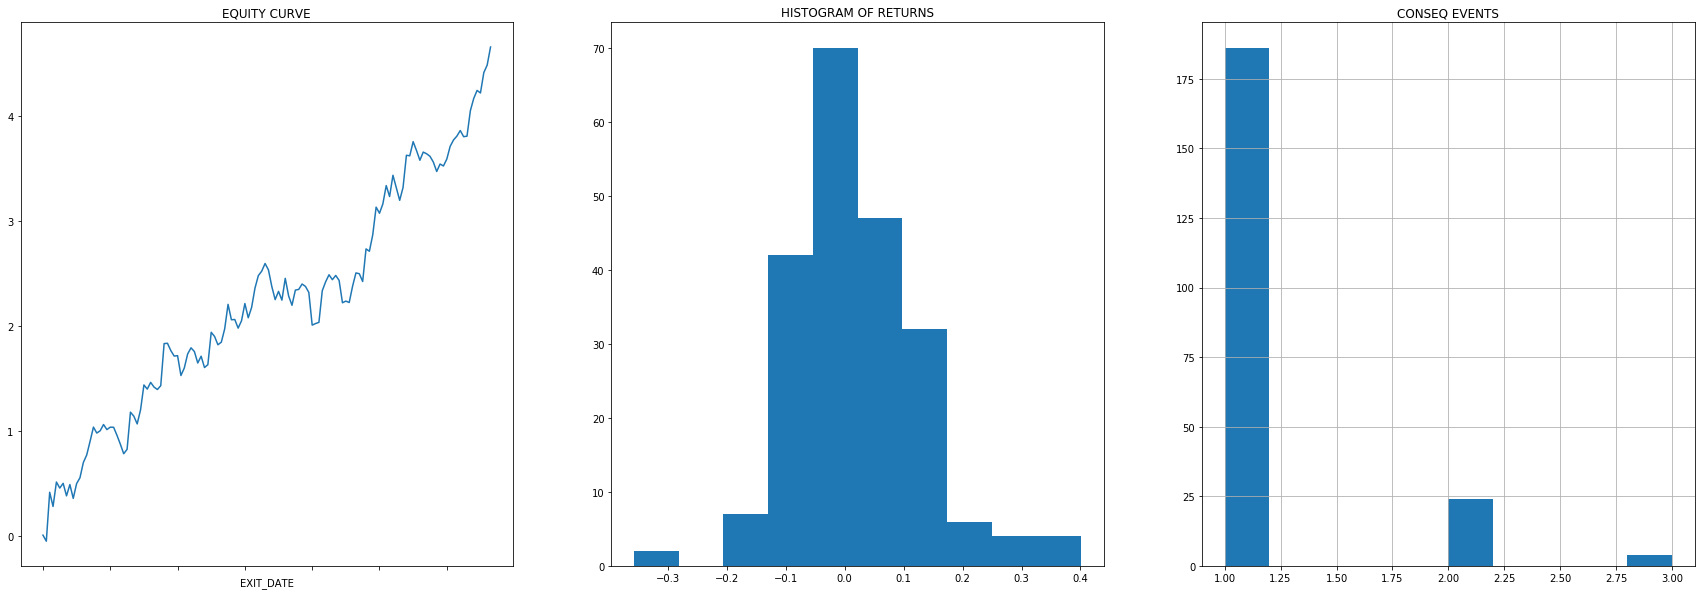

****************************************************************************************************
STDEV LIMIT TEST
LIMIT: 2
STDDEV: 0.2719879397136358
MEAN: 0.05625564297185177
EVENTS EXCLUDED: 6
Total Events: 214


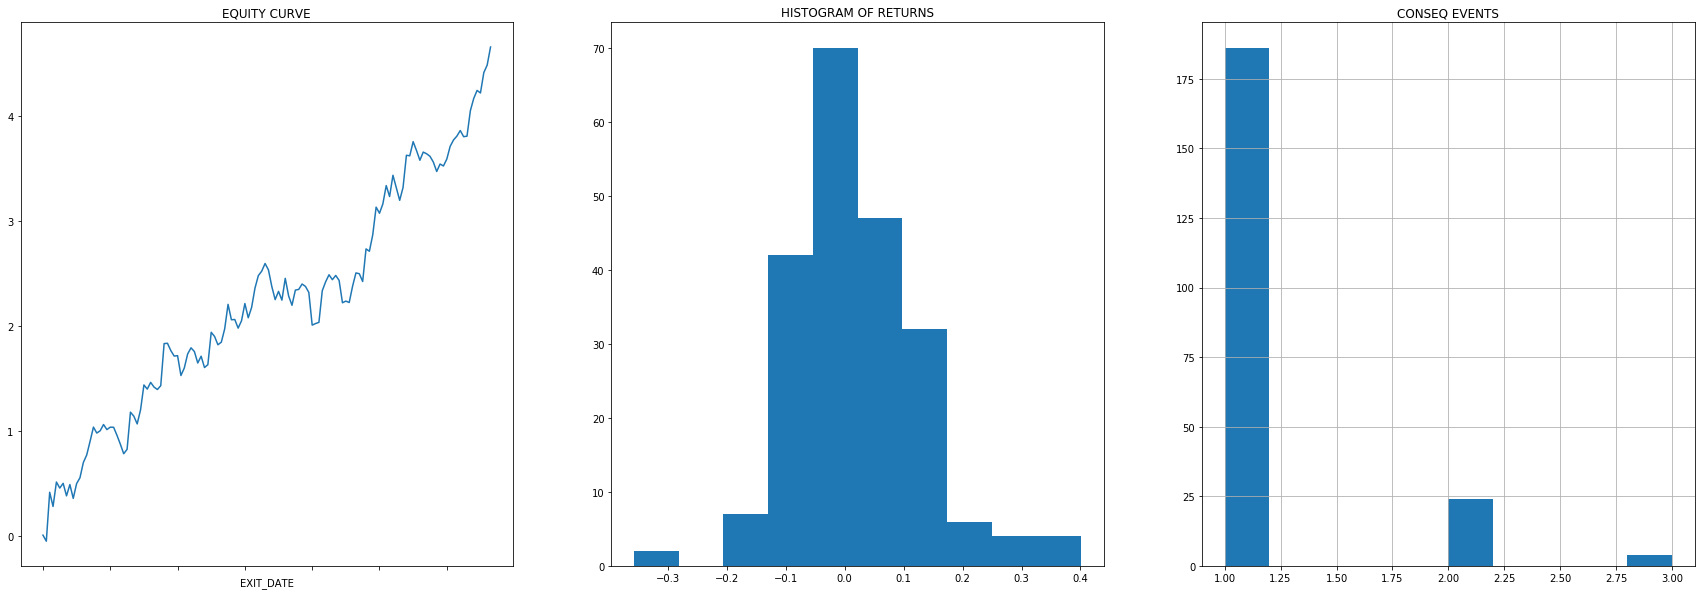

/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-
CONSEQ TEST
LIMIT: 1
STDDEV: 0.2719879397136358
MEAN: 0.05625564297185177
EVENTS EXCLUDED: 34
Total Events: 186


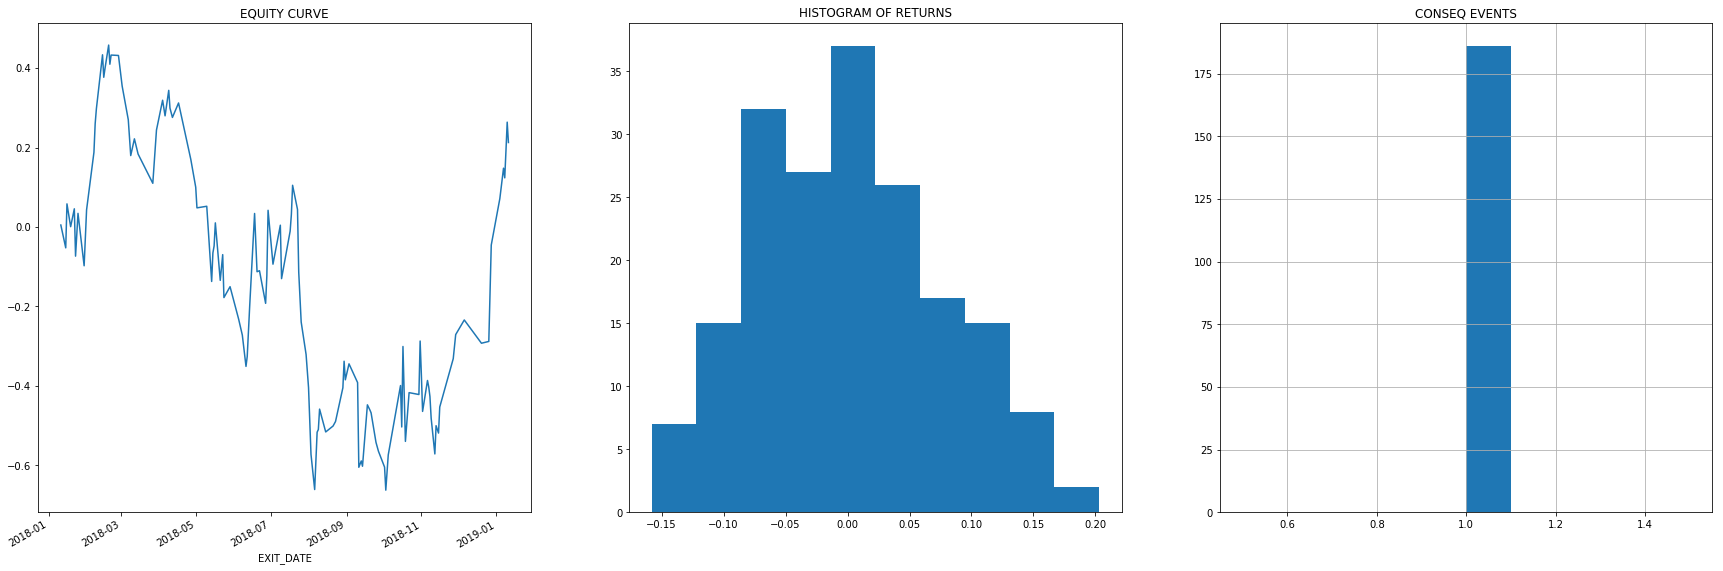

/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-
CONSEQ TEST
LIMIT: 2
STDDEV: 0.2719879397136358
MEAN: 0.05625564297185177
EVENTS EXCLUDED: 10
Total Events: 210


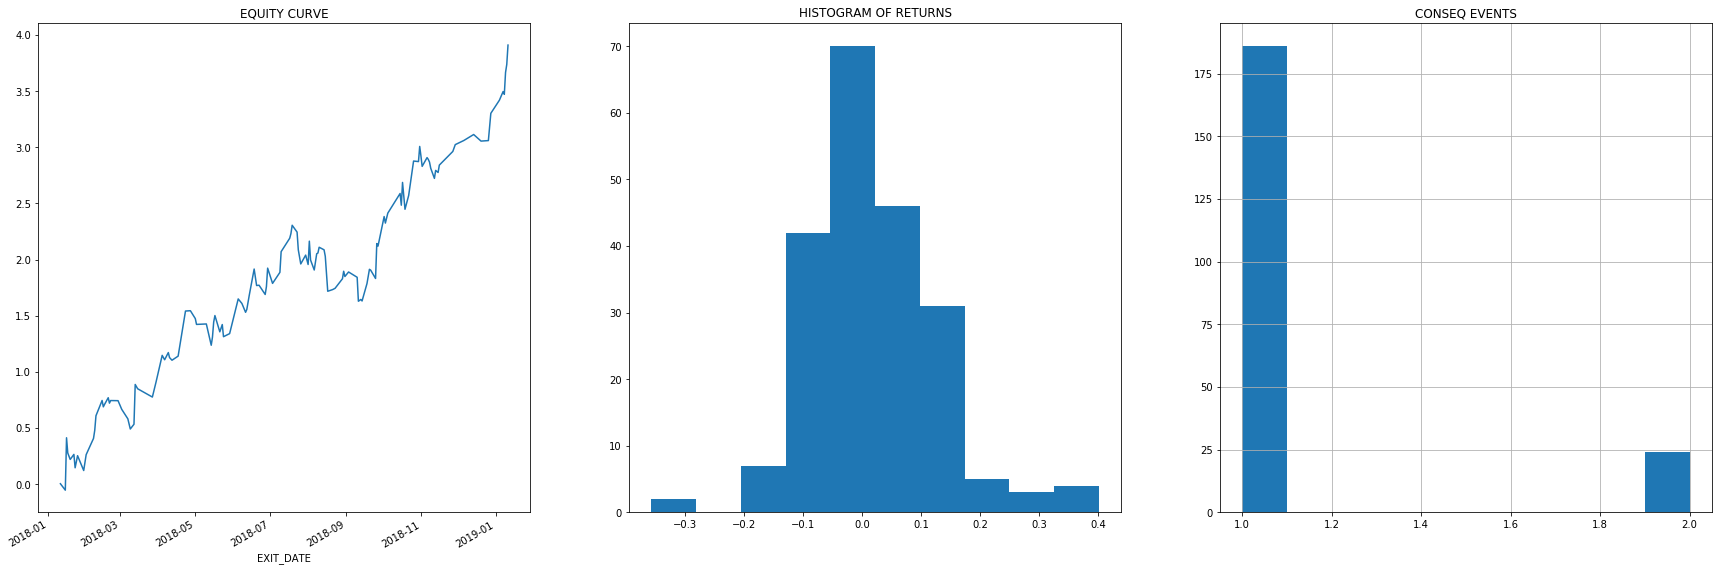

TYPE REVERSE True
VOLUME THOLD: 10000000
Total DataPoints: 2589
DataPoints Excluded: 405
Total Events: 1403


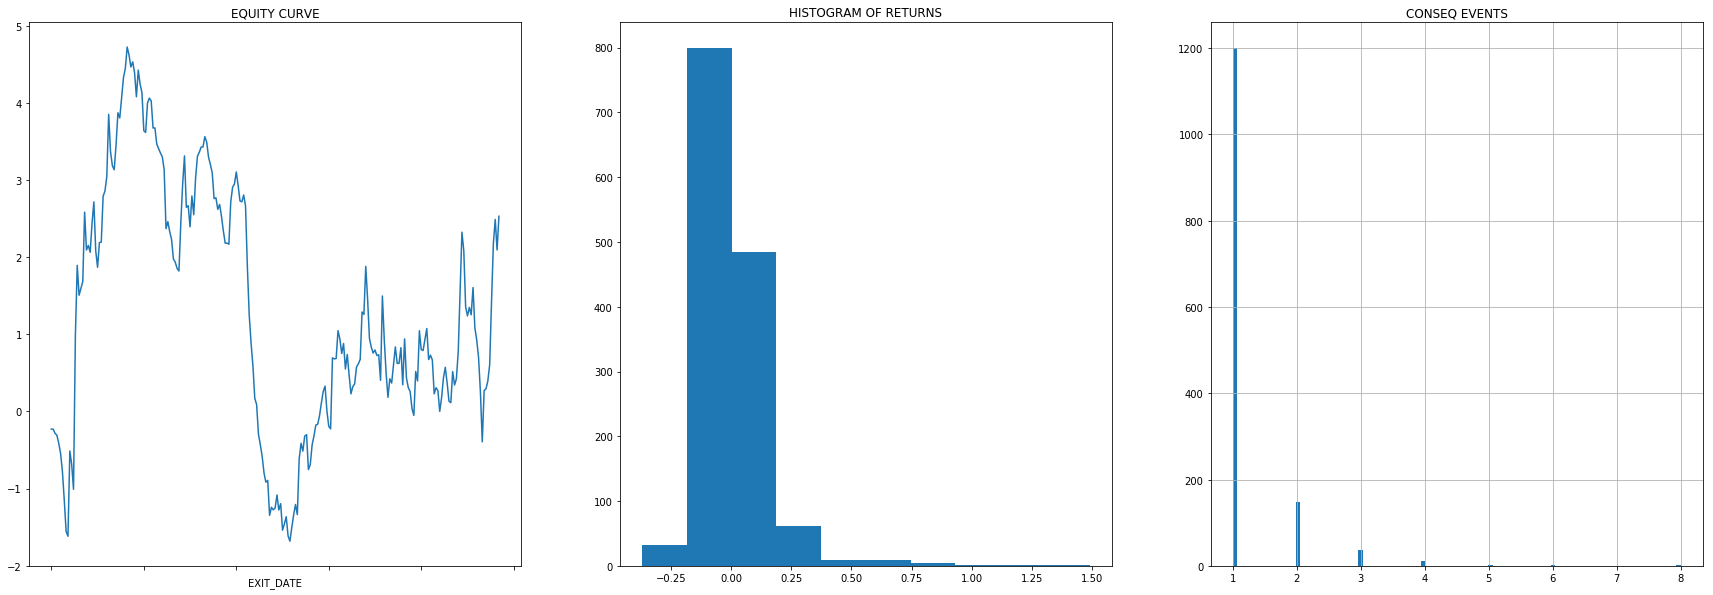

****************************************************************************************************
STDEV LIMIT TEST
LIMIT: 1
STDDEV: 0.1460782438879437
MEAN: 0.0018045817720920485
EVENTS EXCLUDED: 88
Total Events: 1315


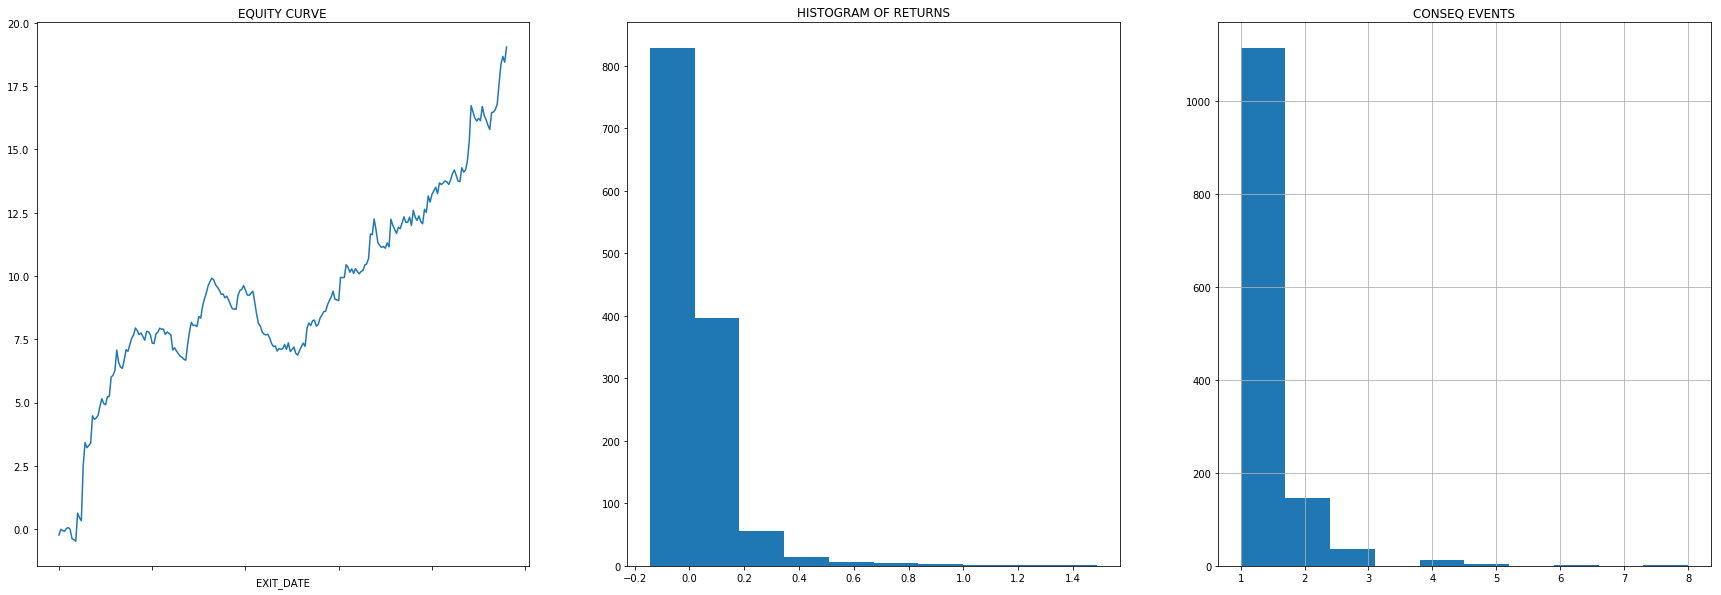

****************************************************************************************************
STDEV LIMIT TEST
LIMIT: 1.5
STDDEV: 0.1460782438879437
MEAN: 0.0018045817720920485
EVENTS EXCLUDED: 14
Total Events: 1389


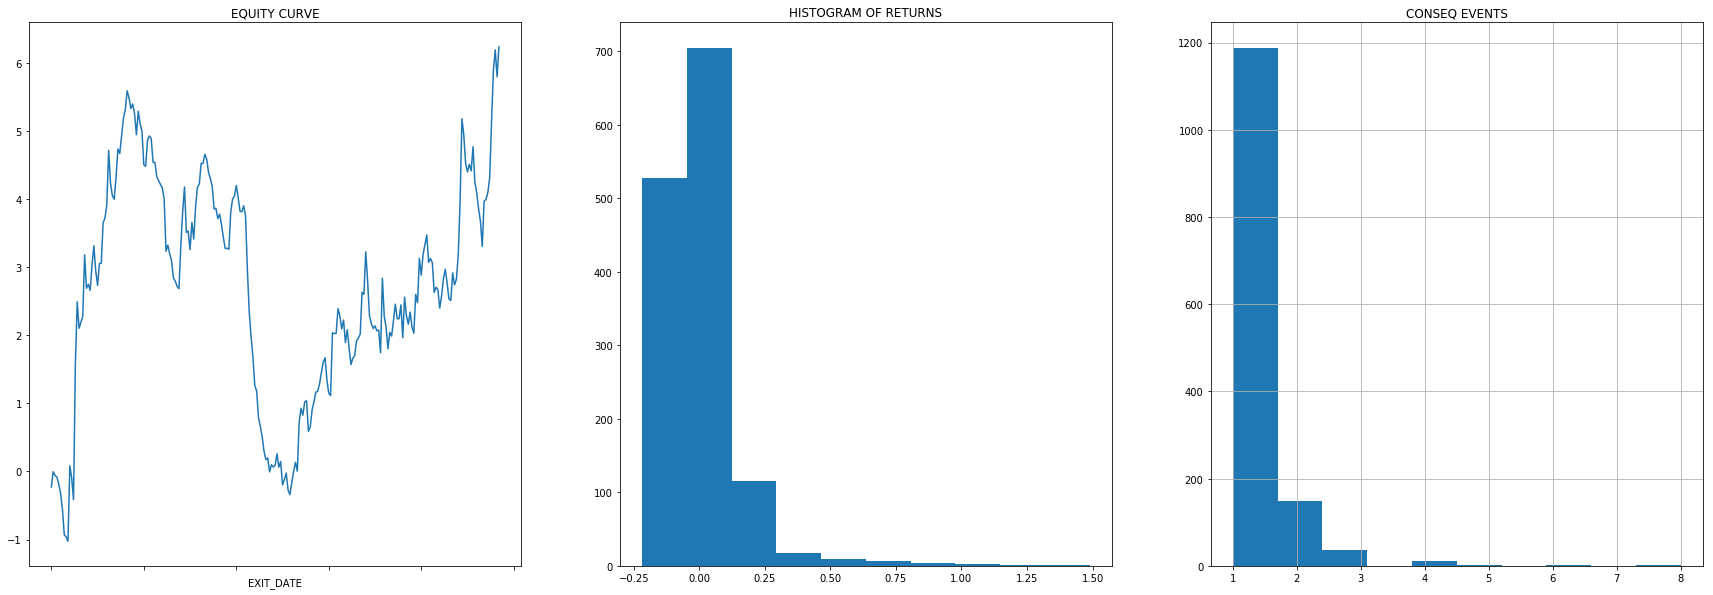

****************************************************************************************************
STDEV LIMIT TEST
LIMIT: 2
STDDEV: 0.1460782438879437
MEAN: 0.0018045817720920485
EVENTS EXCLUDED: 3
Total Events: 1400


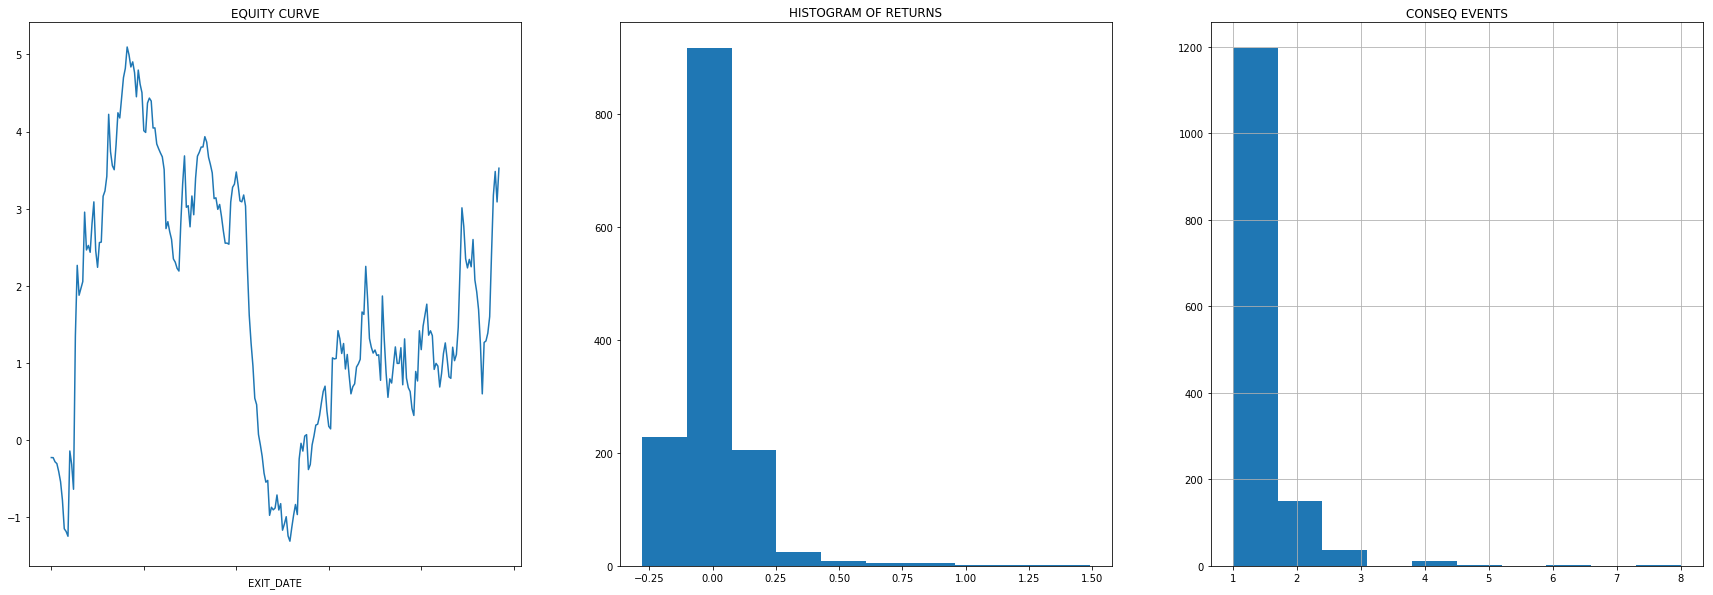

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
TYPE REVERSE False
VOLUME THOLD: 15000000
Total DataPoints: 2589
DataPoints Excluded: 2331
Total Events: 133


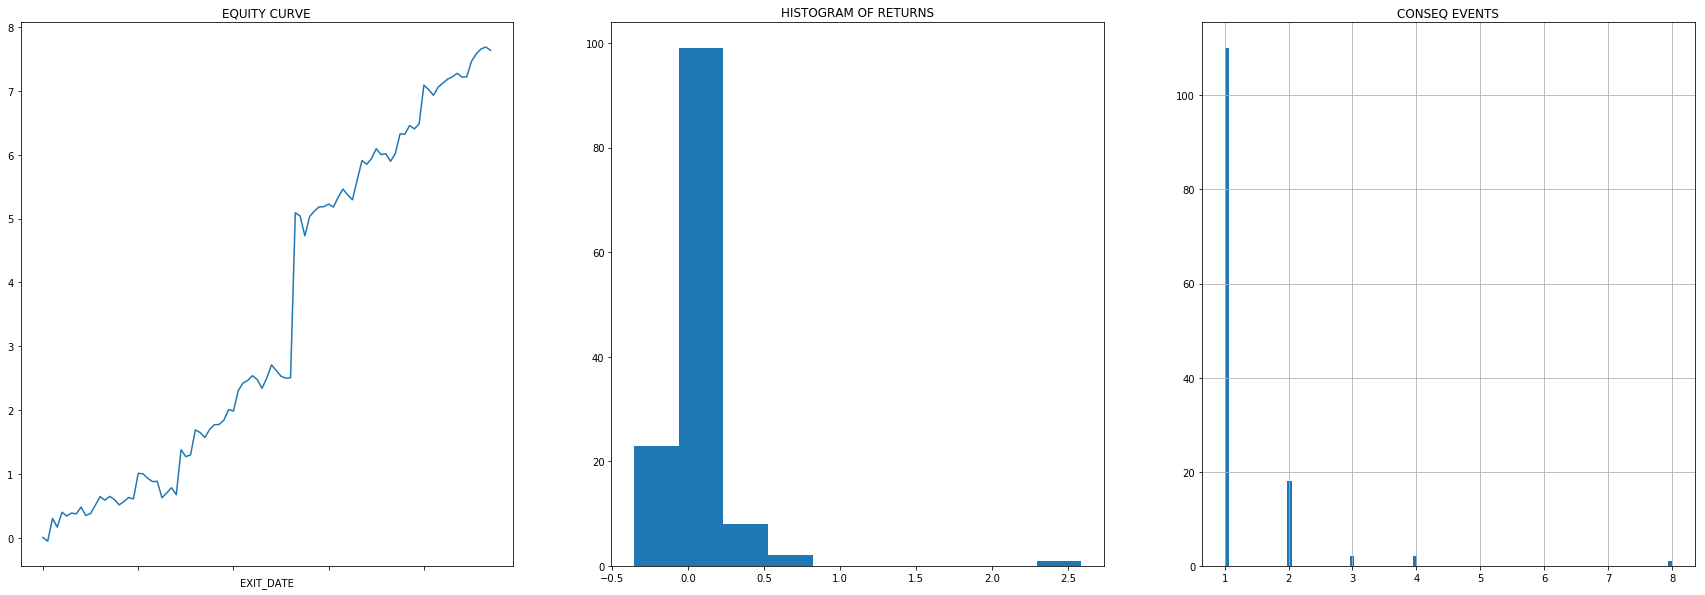

****************************************************************************************************
STDEV LIMIT TEST
LIMIT: 1
STDDEV: 0.26191119963448833
MEAN: 0.057414101319570955
EVENTS EXCLUDED: 10
Total Events: 123


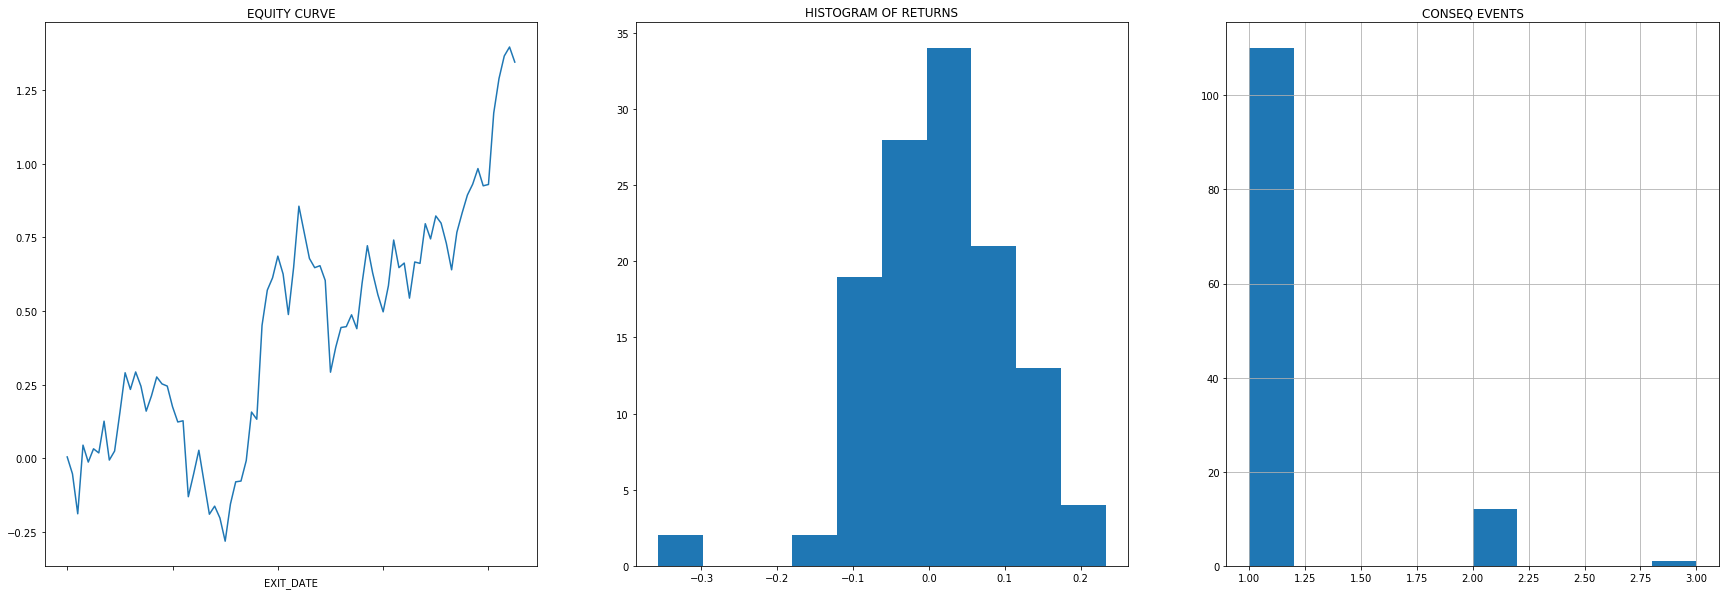

****************************************************************************************************
STDEV LIMIT TEST
LIMIT: 1.5
STDDEV: 0.26191119963448833
MEAN: 0.057414101319570955
EVENTS EXCLUDED: 4
Total Events: 129


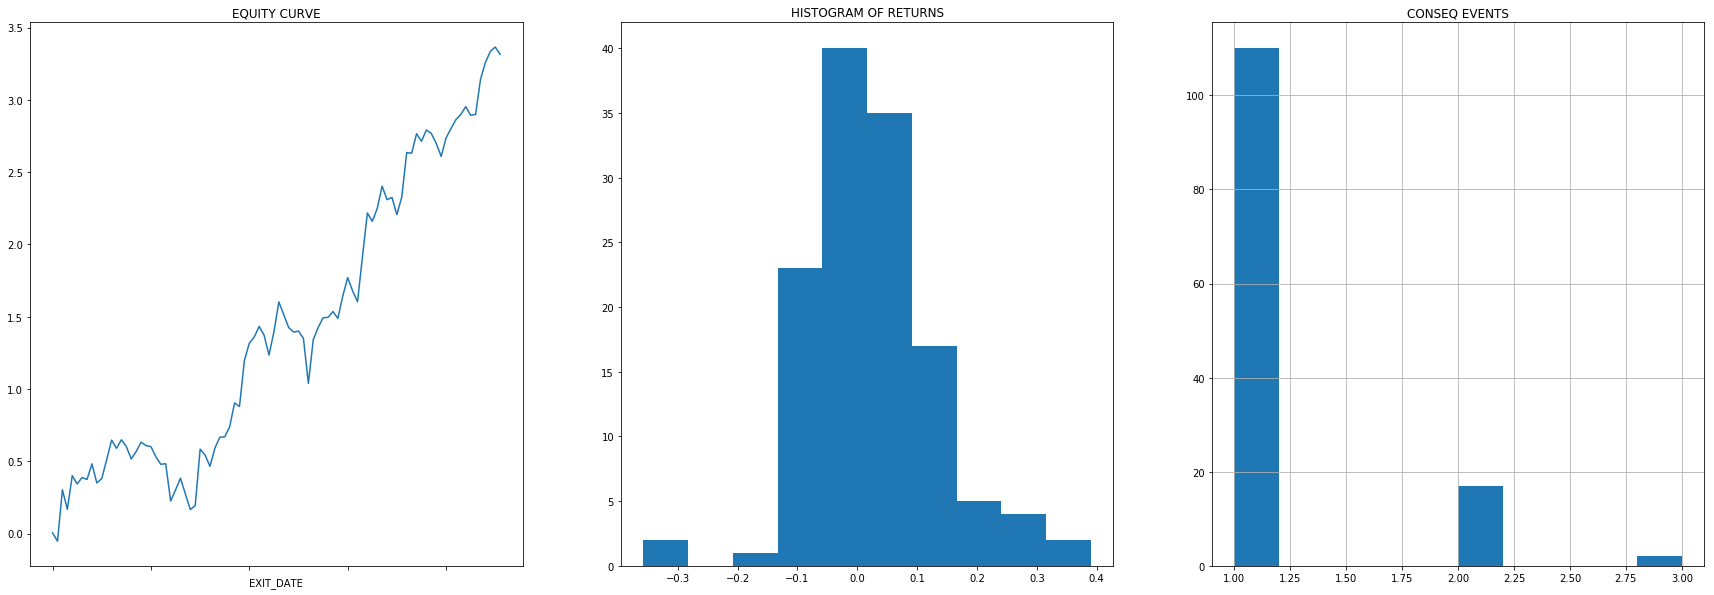

****************************************************************************************************
STDEV LIMIT TEST
LIMIT: 2
STDDEV: 0.26191119963448833
MEAN: 0.057414101319570955
EVENTS EXCLUDED: 3
Total Events: 130


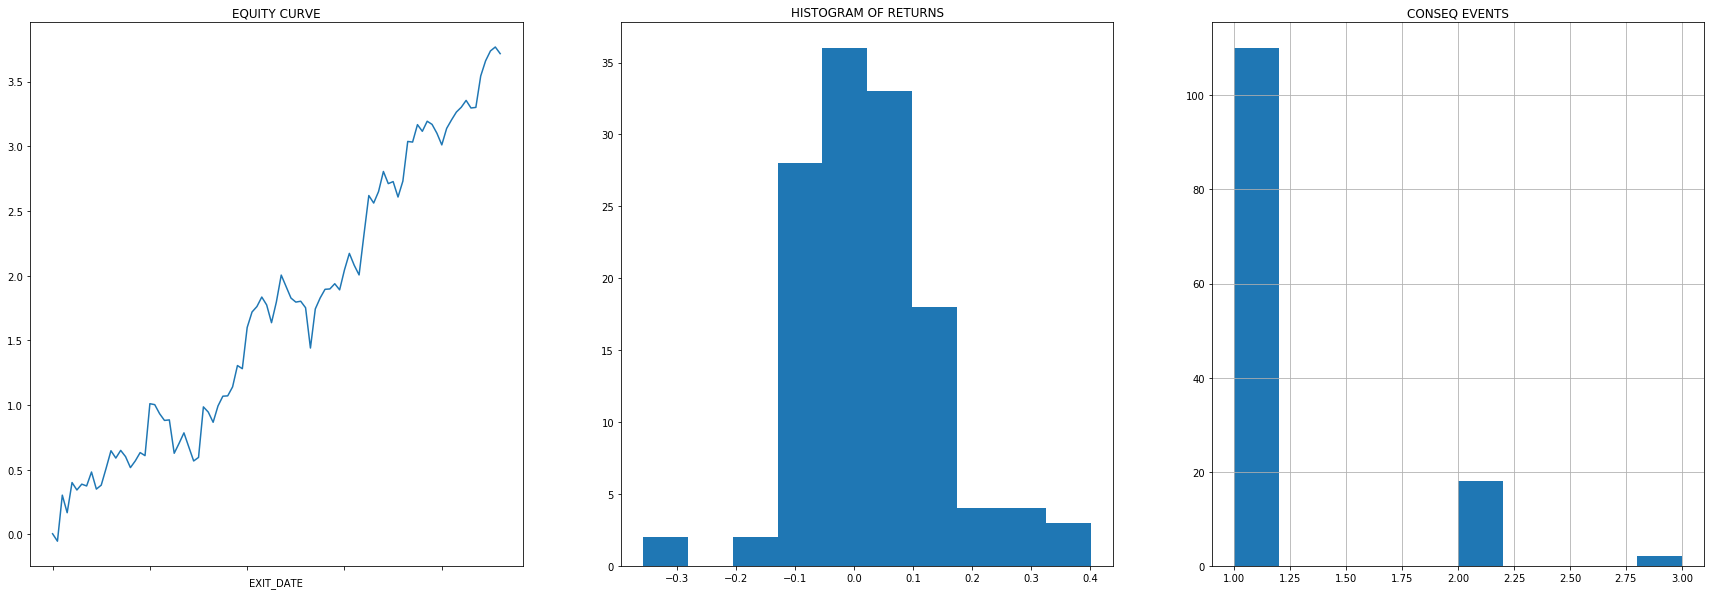

/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-
CONSEQ TEST
LIMIT: 1
STDDEV: 0.26191119963448833
MEAN: 0.057414101319570955
EVENTS EXCLUDED: 23
Total Events: 110


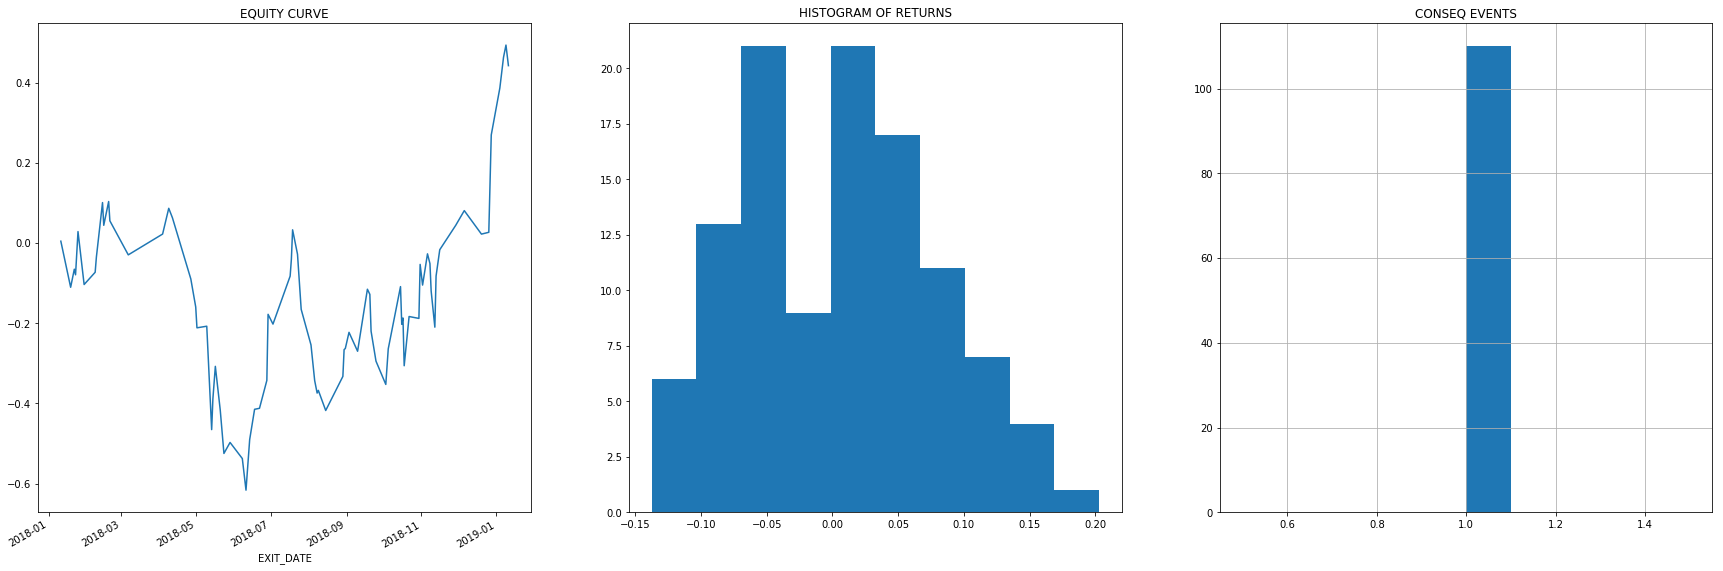

/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-
CONSEQ TEST
LIMIT: 2
STDDEV: 0.26191119963448833
MEAN: 0.057414101319570955
EVENTS EXCLUDED: 5
Total Events: 128


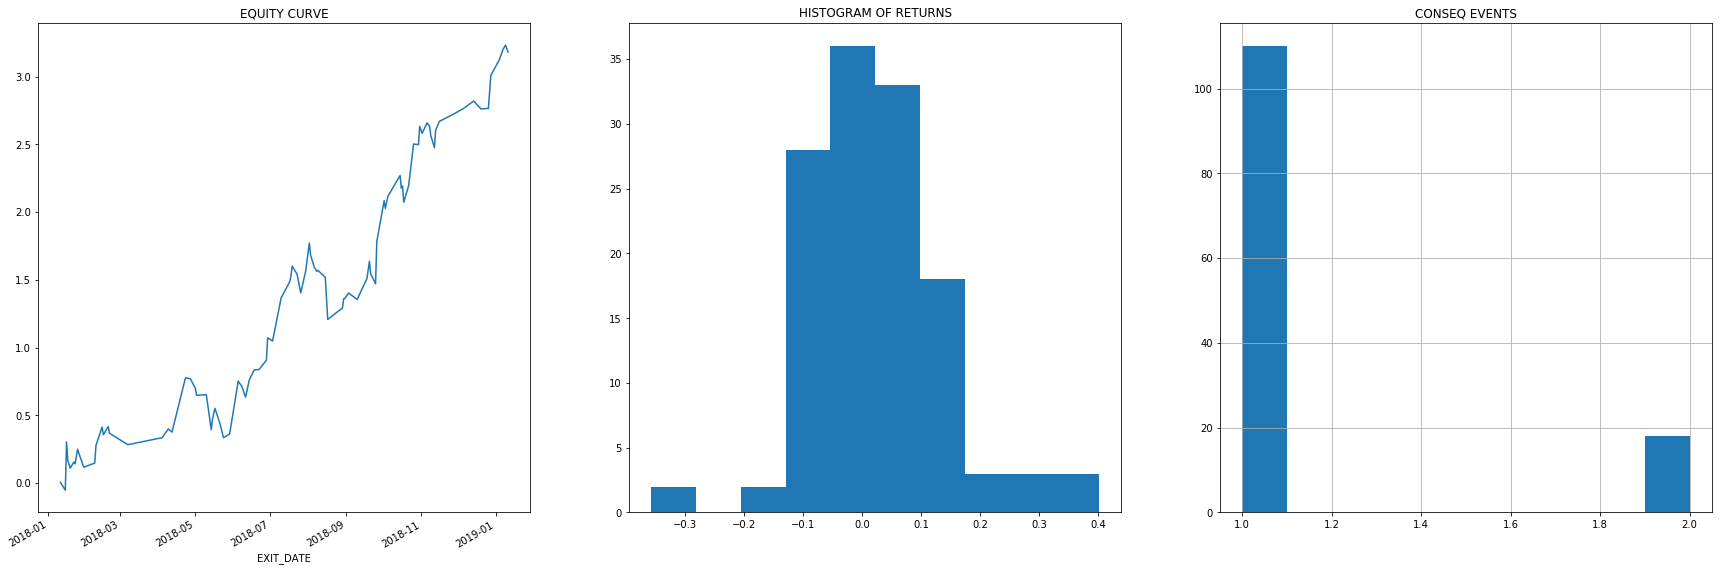

TYPE REVERSE True
VOLUME THOLD: 15000000
Total DataPoints: 2589
DataPoints Excluded: 258
Total Events: 1490


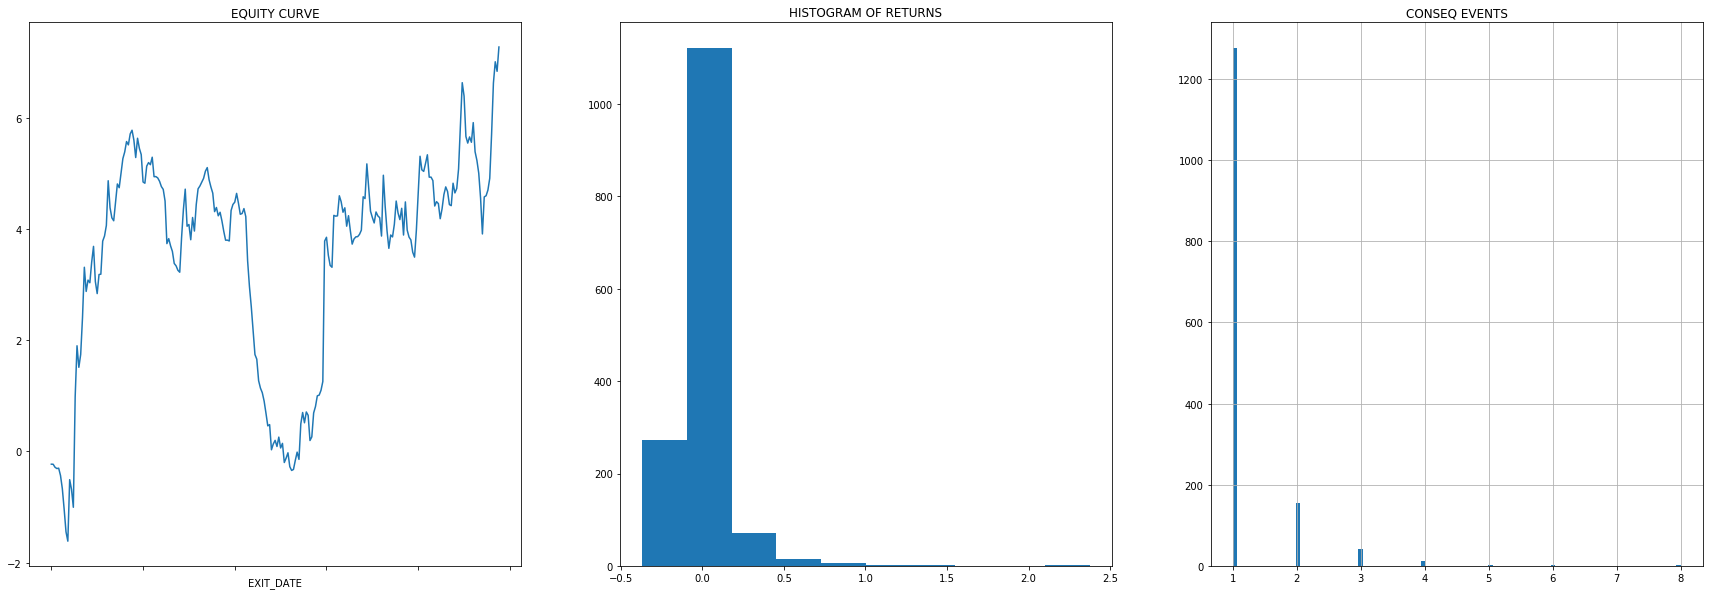

****************************************************************************************************
STDEV LIMIT TEST
LIMIT: 1
STDDEV: 0.15825220112824134
MEAN: 0.004880533023187655
EVENTS EXCLUDED: 70
Total Events: 1420


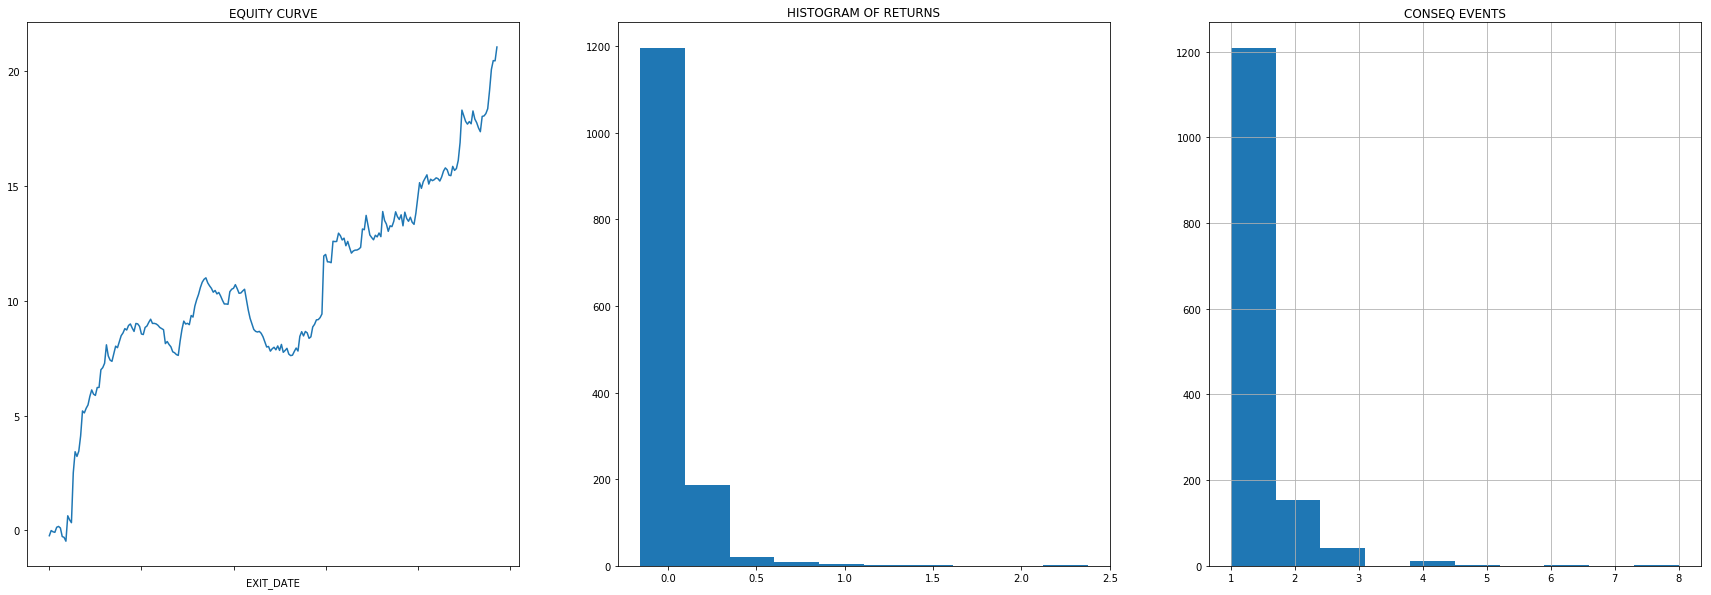

****************************************************************************************************
STDEV LIMIT TEST
LIMIT: 1.5
STDDEV: 0.15825220112824134
MEAN: 0.004880533023187655
EVENTS EXCLUDED: 8
Total Events: 1482


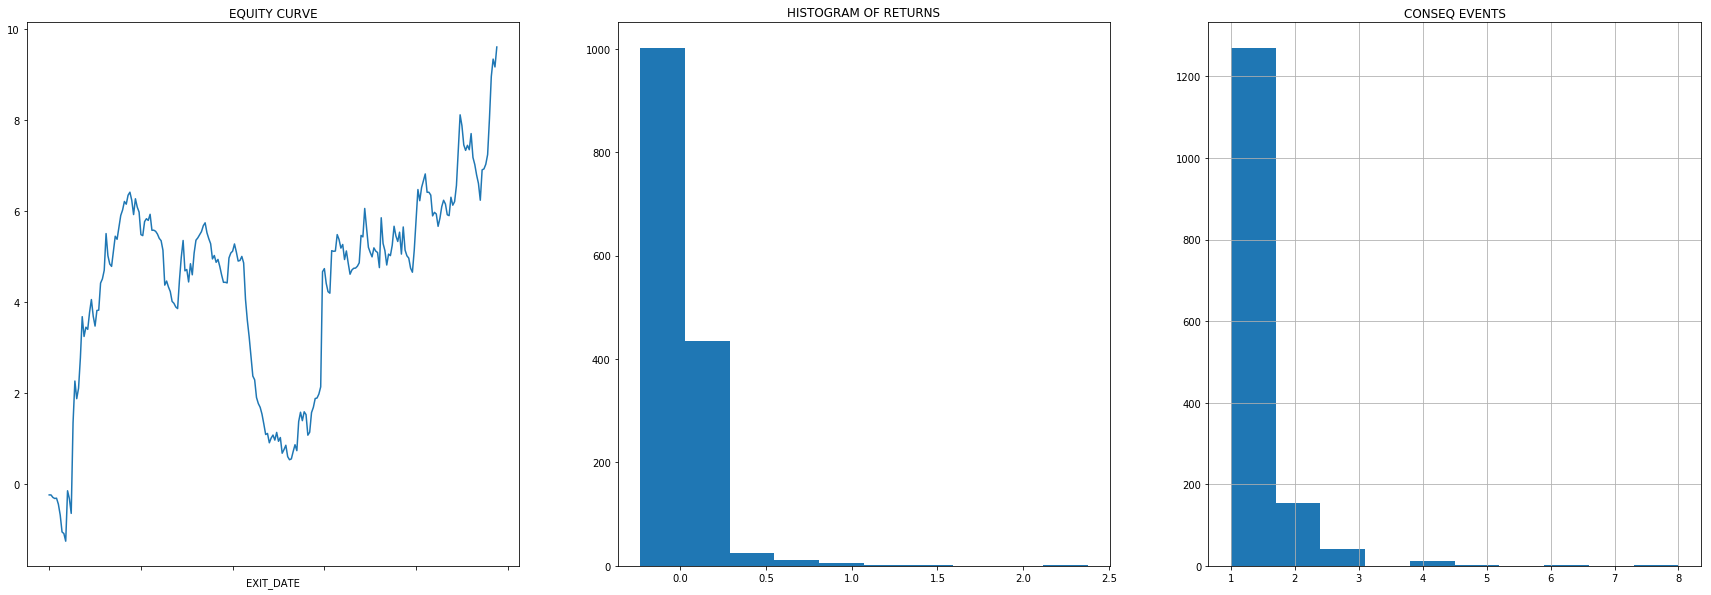

****************************************************************************************************
STDEV LIMIT TEST
LIMIT: 2
STDDEV: 0.15825220112824134
MEAN: 0.004880533023187655
EVENTS EXCLUDED: 1
Total Events: 1489


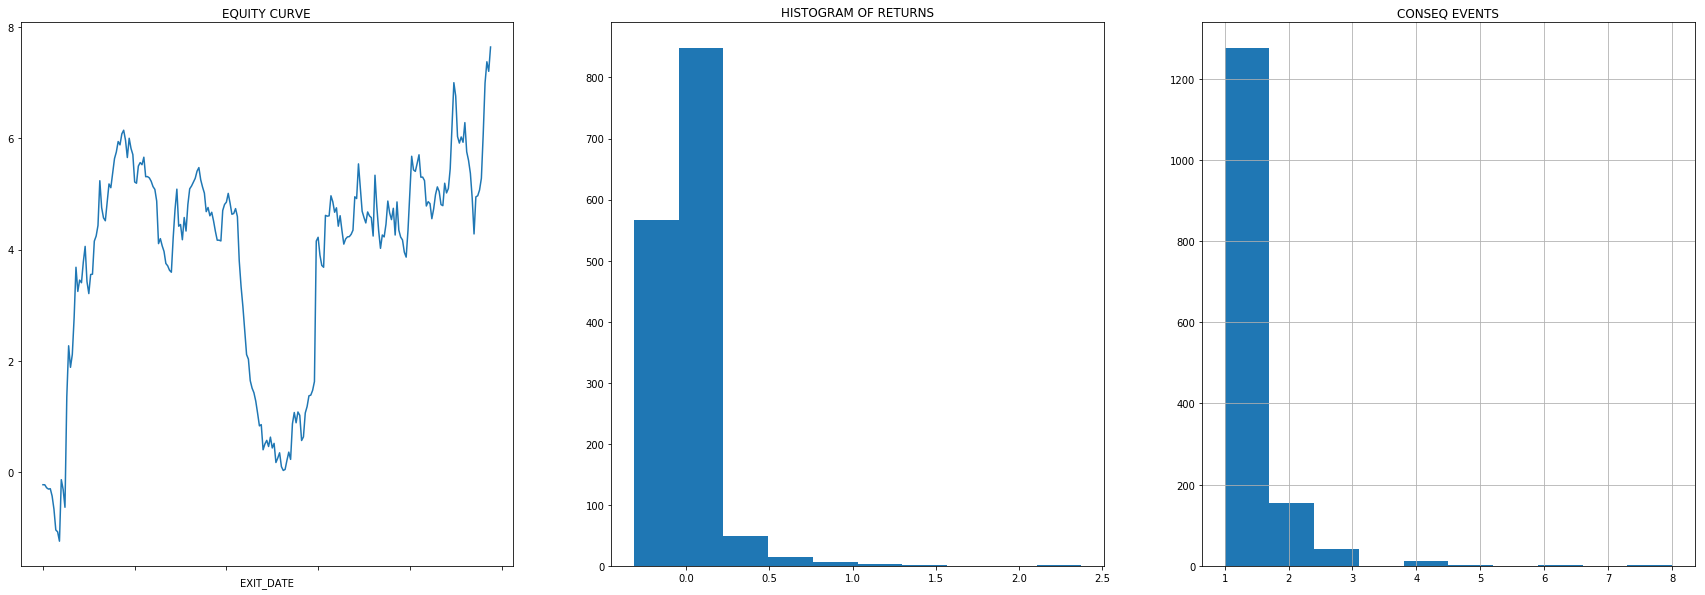

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
TYPE REVERSE False
VOLUME THOLD: 20000000
Total DataPoints: 2589
DataPoints Excluded: 2441
Total Events: 77


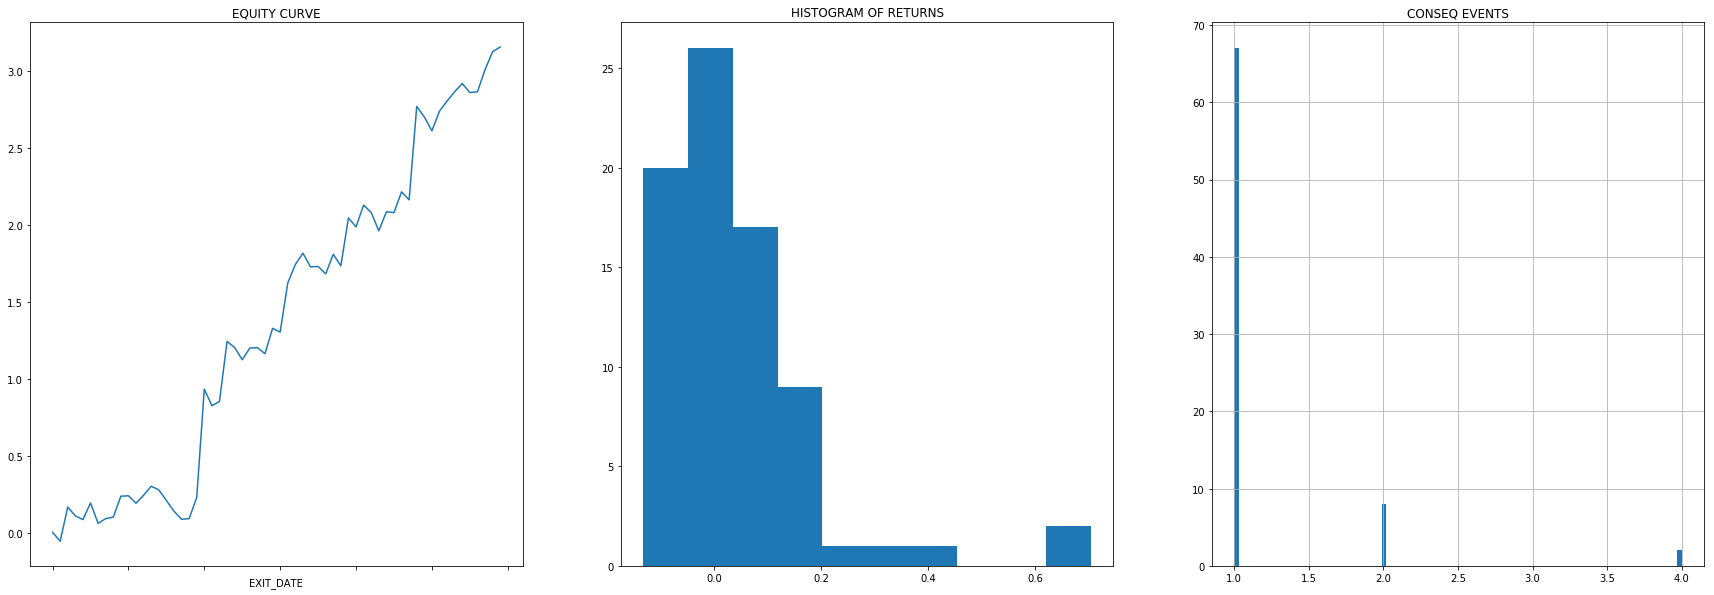

****************************************************************************************************
STDEV LIMIT TEST
LIMIT: 1
STDDEV: 0.14039406520207628
MEAN: 0.04096877702647419
EVENTS EXCLUDED: 10
Total Events: 67


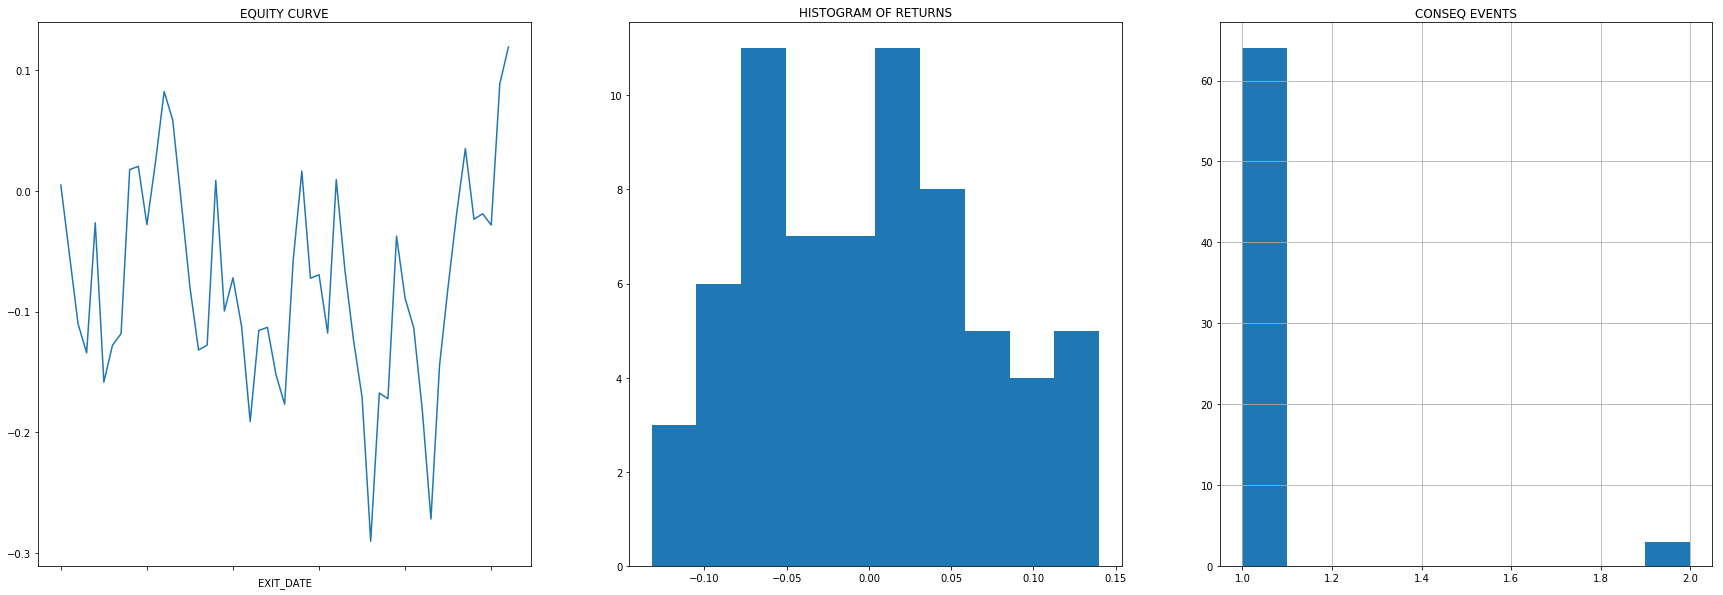

****************************************************************************************************
STDEV LIMIT TEST
LIMIT: 1.5
STDDEV: 0.14039406520207628
MEAN: 0.04096877702647419
EVENTS EXCLUDED: 5
Total Events: 72


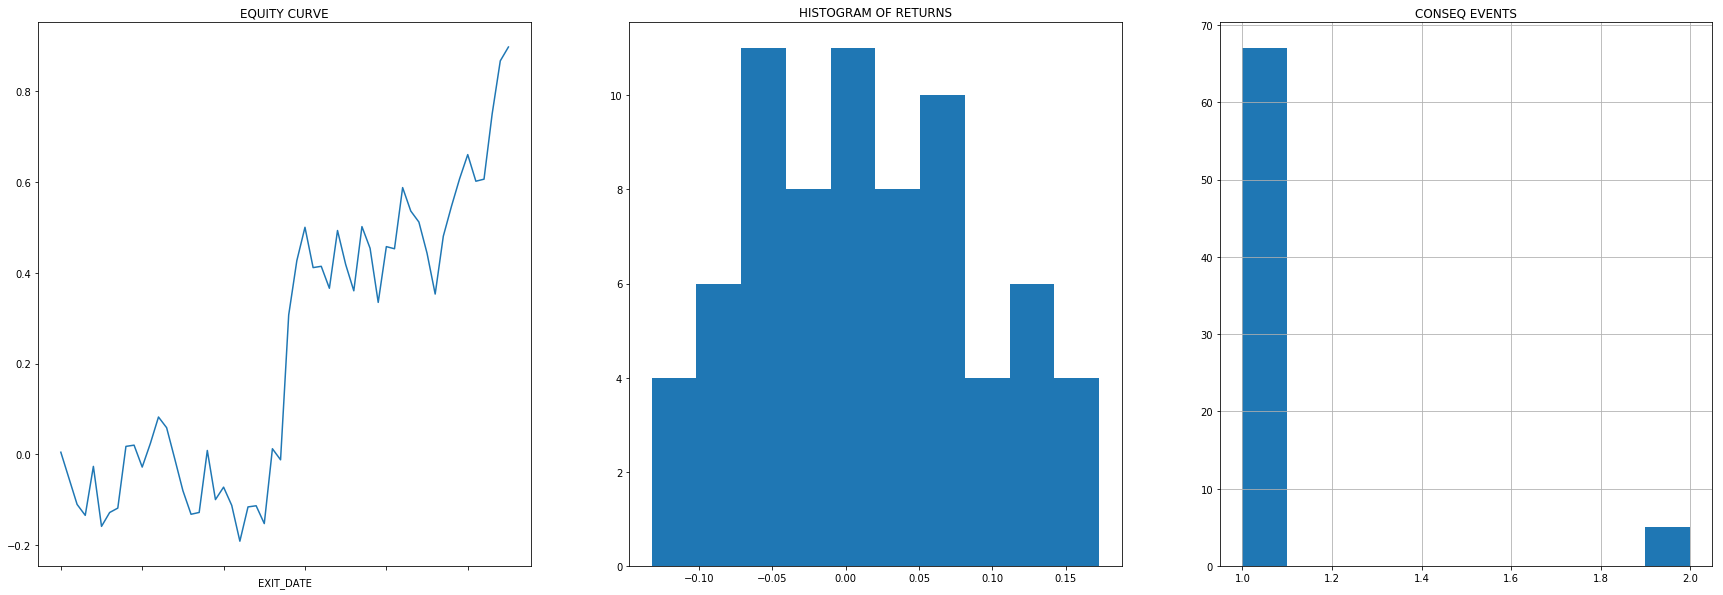

****************************************************************************************************
STDEV LIMIT TEST
LIMIT: 2
STDDEV: 0.14039406520207628
MEAN: 0.04096877702647419
EVENTS EXCLUDED: 4
Total Events: 73


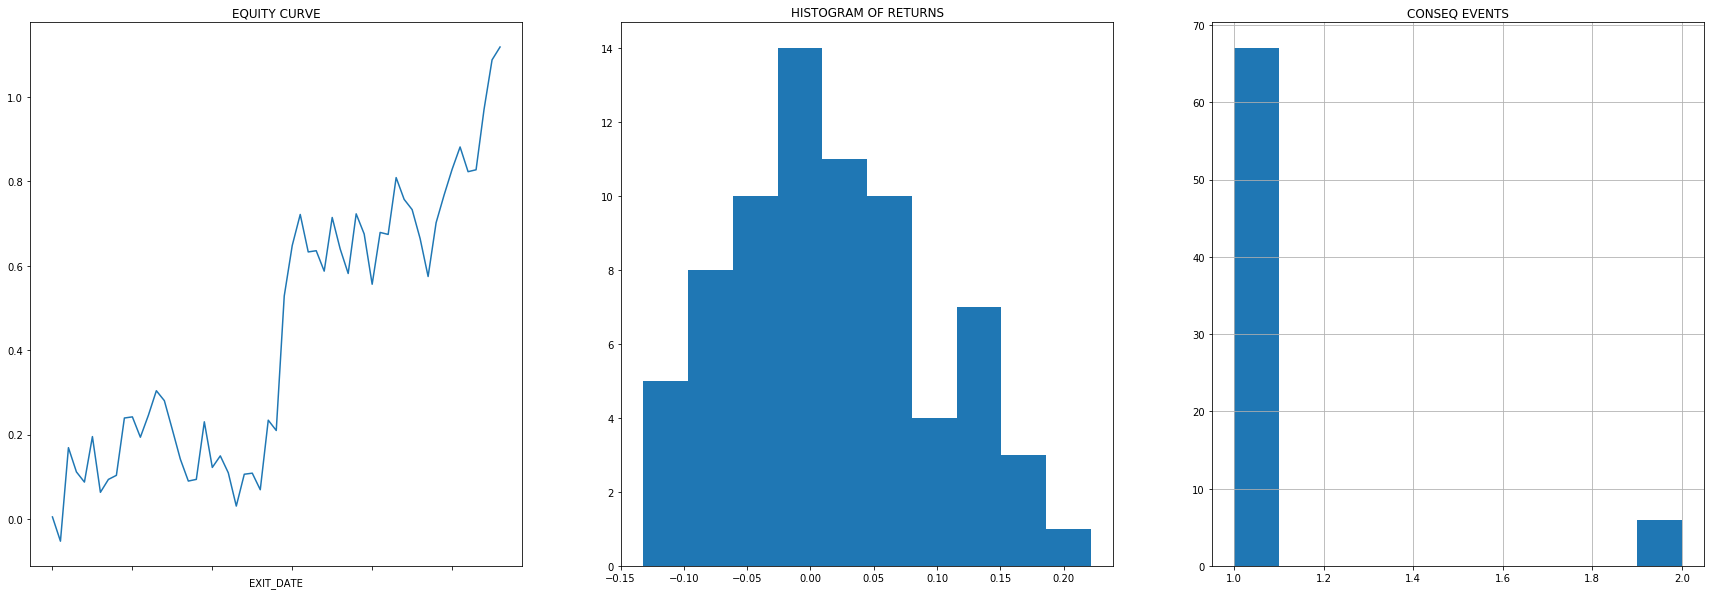

/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-
CONSEQ TEST
LIMIT: 1
STDDEV: 0.14039406520207628
MEAN: 0.04096877702647419
EVENTS EXCLUDED: 10
Total Events: 67


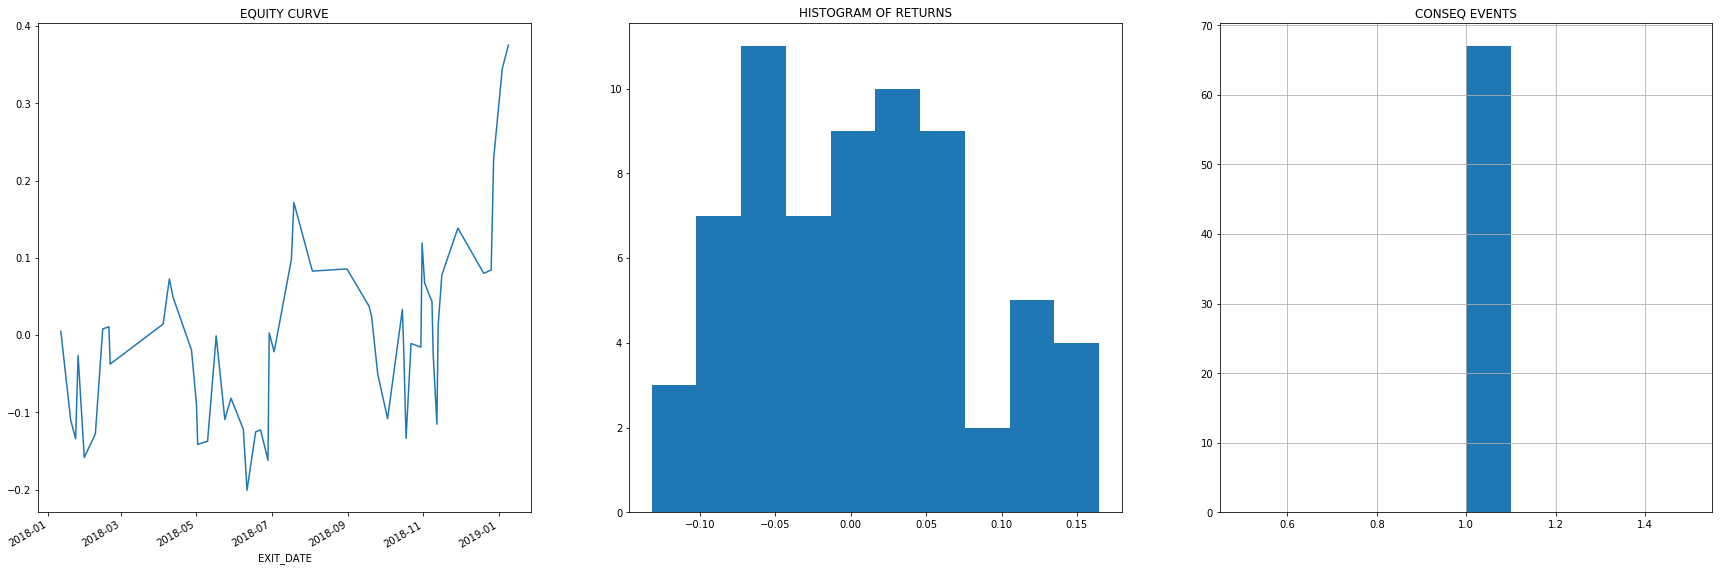

/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-
CONSEQ TEST
LIMIT: 2
STDDEV: 0.14039406520207628
MEAN: 0.04096877702647419
EVENTS EXCLUDED: 2
Total Events: 75


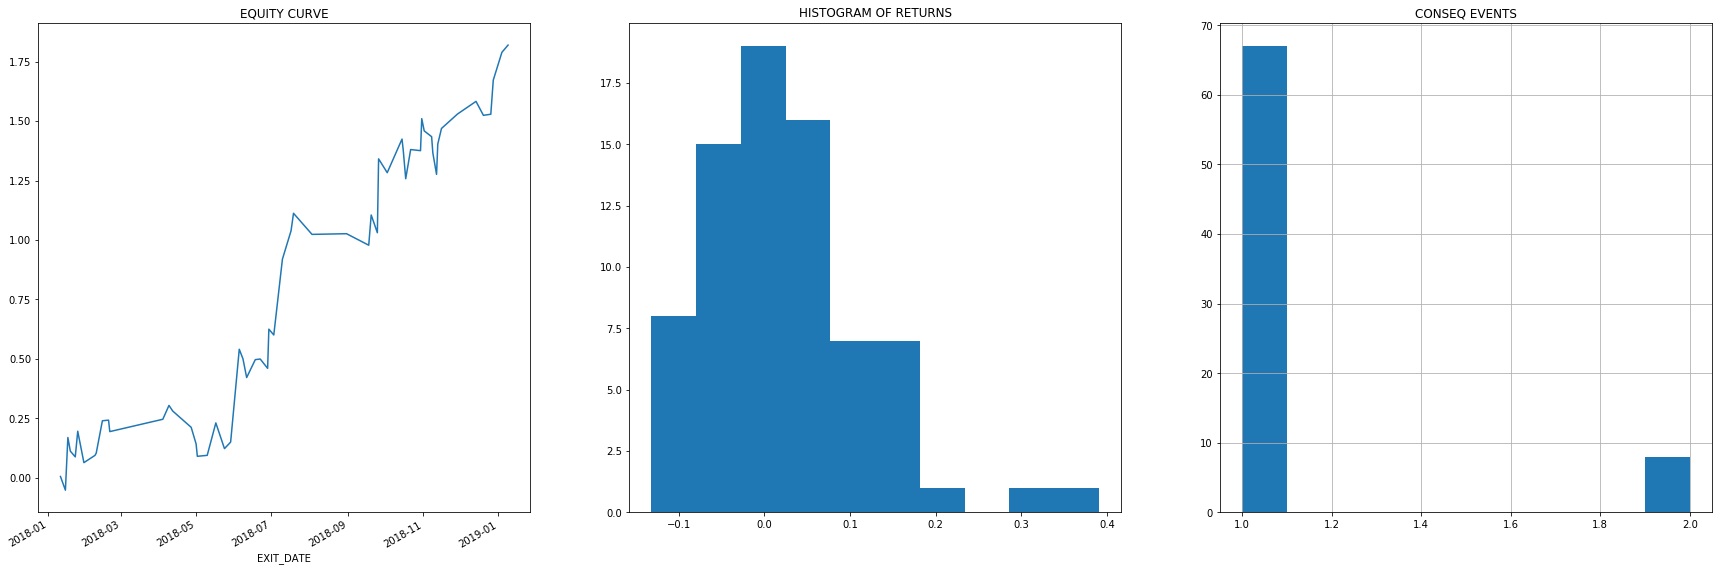

TYPE REVERSE True
VOLUME THOLD: 20000000
Total DataPoints: 2589
DataPoints Excluded: 148
Total Events: 1546


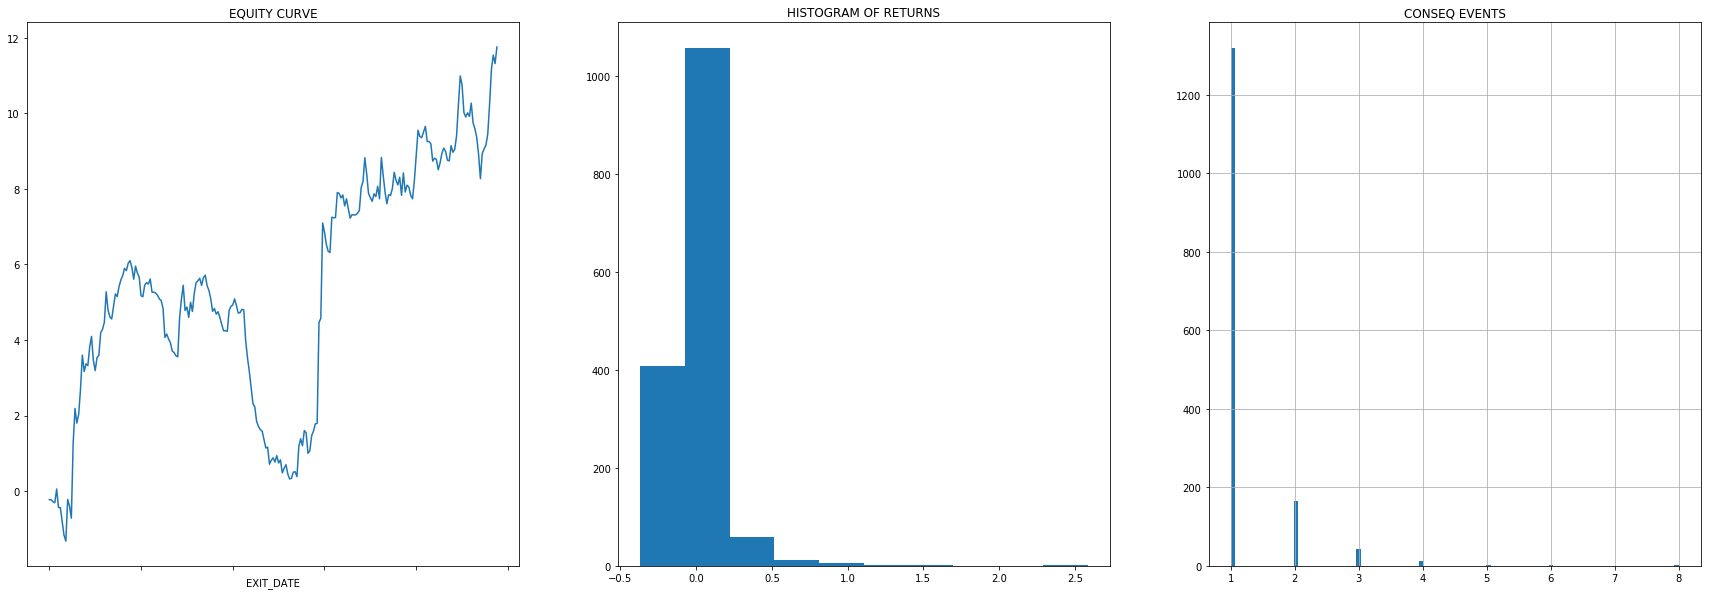

****************************************************************************************************
STDEV LIMIT TEST
LIMIT: 1
STDDEV: 0.17085799212062464
MEAN: 0.007602505723812431
EVENTS EXCLUDED: 50
Total Events: 1496


****************************************************************************************************
STDEV LIMIT TEST
LIMIT: 1.5
STDDEV: 0.17085799212062464
MEAN: 0.007602505723812431
EVENTS EXCLUDED: 9
Total Events: 1537


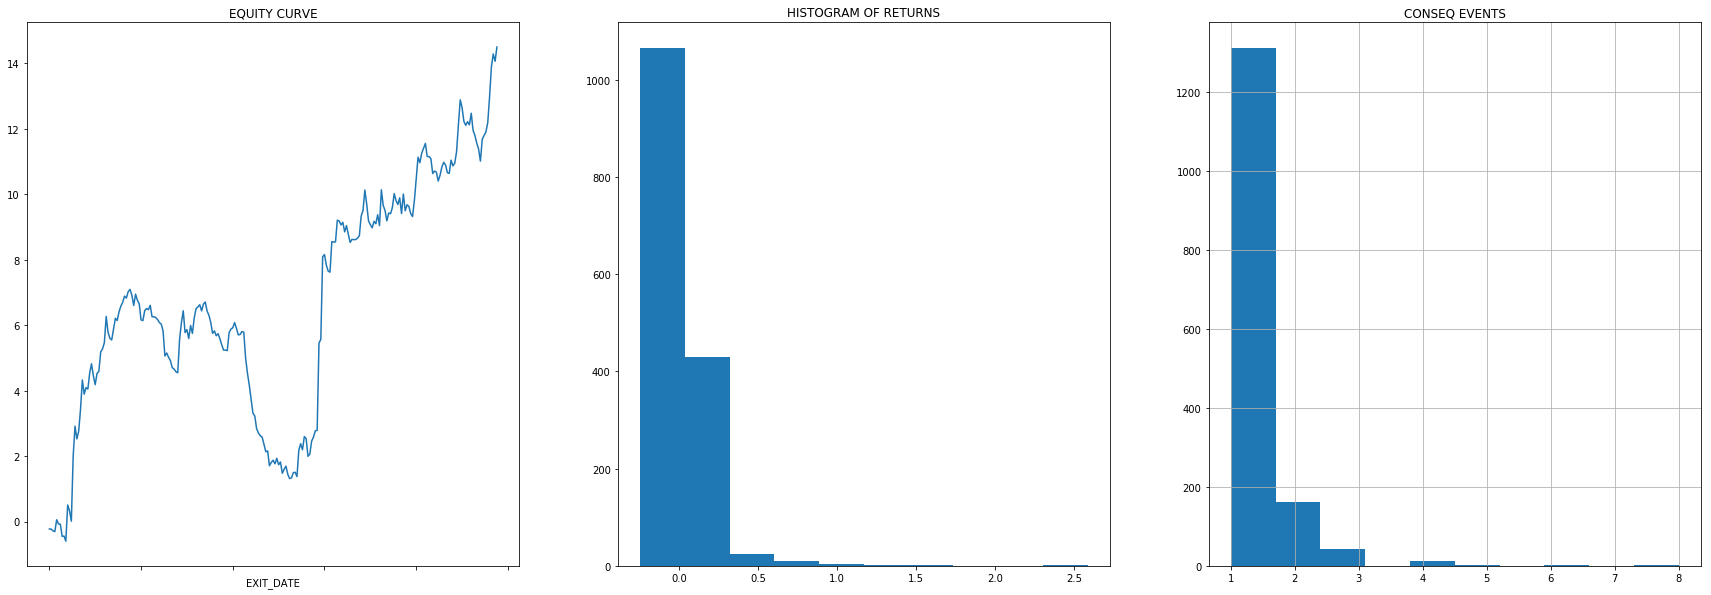

****************************************************************************************************
STDEV LIMIT TEST
LIMIT: 2
STDDEV: 0.17085799212062464
MEAN: 0.007602505723812431
EVENTS EXCLUDED: 2
Total Events: 1544


In [26]:
test_horizon=[0,1,5,10,15,20]

for x in test_horizon:
    print("-"*200)
    A=filter_vol(x*1000000)
    if x==0:
        pass
    else:
        A=filter_vol(x*1000000,reverse=True)



# MONTE CARLO


In [31]:
# take out random events in increments of 5,10,15...100 and see how the equity curve looks like

In [276]:
monte_frame=filter_vol(10*1000000,reverse=False,plot=False)

TYPE REVERSE False
VOLUME THOLD: 10000000
Total DataPoints: 2589
DataPoints Excluded: 2184
Total Events: 220


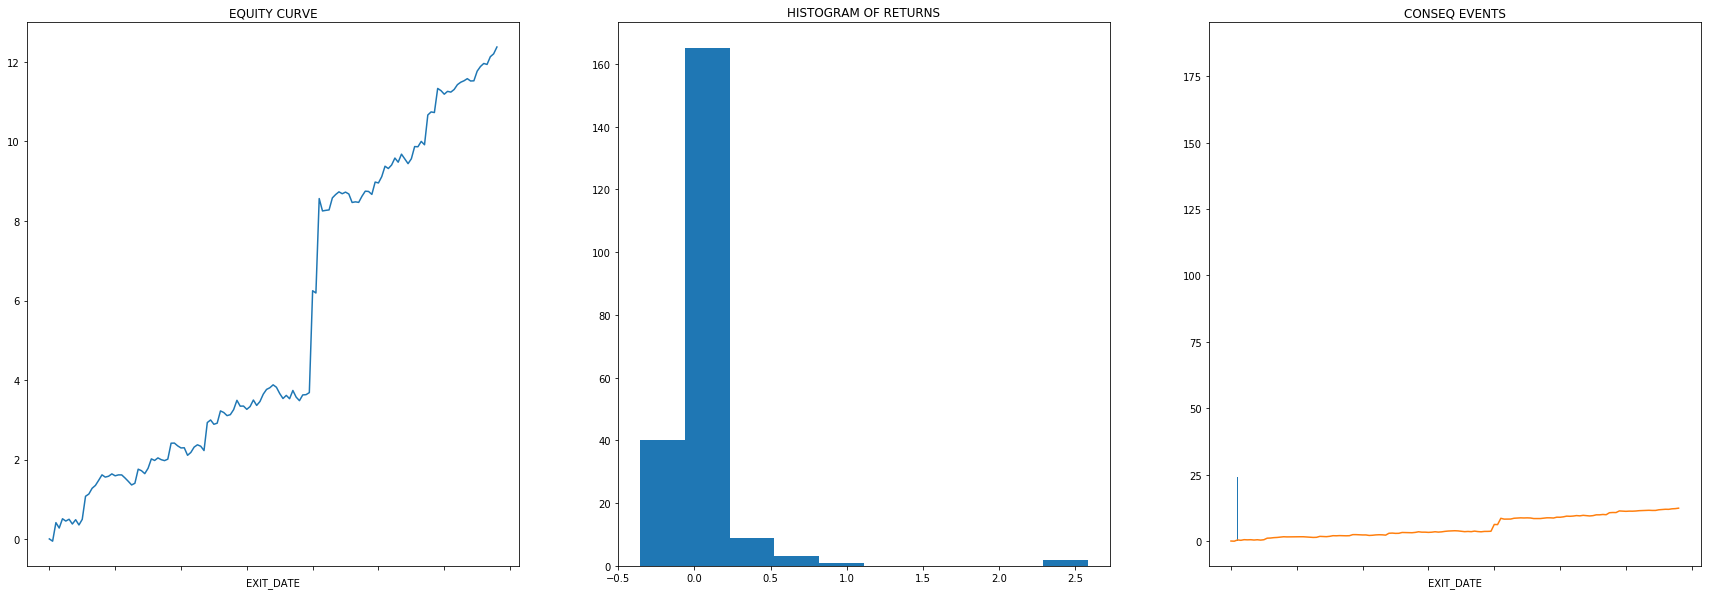

In [277]:
monte_frame_1=monte_frame[0]
monte_frame_1.groupby(['EXIT_DATE'])['RETURN'].sum().sort_index().cumsum().plot()
plt.show()
monte_frame_1=monte_frame_1.reset_index()
monte_frame_1['UNIQ']=monte_frame_1['EXIT_DATE'].map(str)+str('**')+monte_frame_1['CODE'].map(str)
my_dates=monte_frame_1.UNIQ.values

monte_frame_1=monte_frame_1.set_index('EXIT_DATE')


1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
23 done
24 done
25 done
26 done
27 done
28 done
29 done
30 done
31 done
32 done
33 done
34 done
35 done
36 done
37 done
38 done
39 done
40 done
41 done
42 done


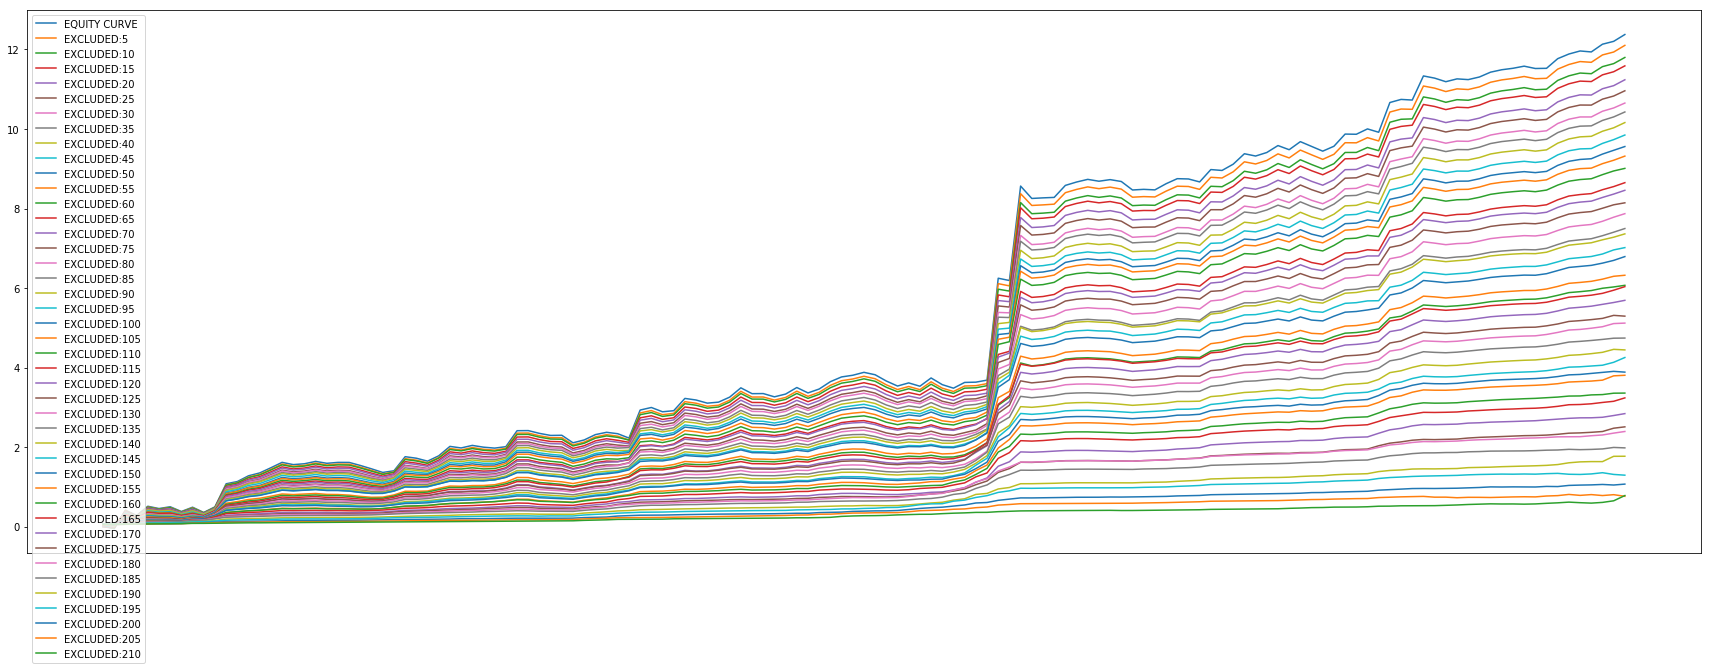

In [279]:
plt.figure(figsize=(30,10))
plt.plot(monte_frame_1.groupby(['EXIT_DATE'])['RETURN'].sum().sort_index().cumsum(),label="EQUITY CURVE")

trials=1000
exclude_increments=43

for y in range(1,exclude_increments):
    my_framez=pd.DataFrame(index=monte_frame_1.index)
    
    for x in range(trials):
        mm_frame=monte_frame_1.copy()
        
        bad_df=pd.DataFrame()
        new_df=pd.DataFrame()
        num_to_select = y*5                     
        list_of_random_items = random.sample(list(my_dates), num_to_select)

        bad_df = mm_frame.UNIQ.isin(list_of_random_items)
        new_df=mm_frame[~bad_df]

        my_val=new_df.groupby(['EXIT_DATE'])['RETURN'].sum().sort_index().cumsum()
        my_framez[str(x)]=my_val
    print(y,"done")
    my_framez=my_framez.sort_index().fillna(method='bfill').mean(axis=1)
    plt.plot(my_framez,label='EXCLUDED:'+str(num_to_select))
plt.xticks([])
plt.legend()
plt.show()

In [261]:
monte_frame_1['RETURN'].hist(bins=100)
plt.show()

In [145]:
mote_frame_1=monte_frame_1[monte_frame_1['UNIQ'].duplicated()]

In [146]:
mote_frame_1

Empty DataFrame
Columns: [CODE, EXIT_DATE, ENTRY_PRICE, EXIT_PRICE, AVVALUE, RETURN, UNIQ]
Index: []

In [241]:
new_df

ENTRY_DATE  CODE  ENTRY_PRICE  EXIT_PRICE         AVVALUE  \
EXIT_DATE                                                               
2018-01-17  2018-01-15  3323    473.00000   304.00000  19059829.25167   
2018-01-23  2018-01-22  3323    395.00000   399.00000  19059829.25167   
2018-10-15  2018-10-12  3356   1585.00000  1809.00000  33426338.35205   
2018-06-05  2018-06-04  3446   6970.00000  6400.00000  13363758.74638   
2018-01-11  2018-01-10  3660   1050.00000  1055.00000  21348263.01762   
2018-04-06  2018-04-05  3784   1984.00000  1906.00000  12132709.23447   
2018-04-10  2018-04-09  3784   2306.00000  2203.00000  12132709.23447   
2018-02-16  2018-02-15  3791   3445.00000  3520.00000  11507383.60417   
2018-06-22  2018-06-21  3906   7880.00000  7900.00000  51125758.81762   
2018-07-19  2018-07-18  3906   6530.00000  7010.00000  51125758.81762   
2018-08-03  2018-08-02  3906   7660.00000  6980.00000  51125758.81762   
2018-08-01  2018-07-31  4394   6110.00000  5600.00000  12630501.13000   
2018-11-06  2018-11-05  4398   2999.00000  3020.00000  18134520.59104   
2018-11-09  2018-11-08  4420   5005.00000  5170.00000  28190711.13393   
2018-11-16  2018-11-15  4420   5255.00000  5600.00000  28190711.13393   
2019-01-09  2019-01-08  4422   2861.00000  2970.00000  13106594.58333   
2018-11-29  2018-11-28  4506   3243.00000  3440.00000  49983699.64836   
2018-06-18  2018-06-15  5218   2719.00000  3150.00000  14443308.82992   
2018-08-06  2018-08-03  7034   8560.00000  7800.00000  16920921.02062   
2018-12-20  2018-12-19  7046   7680.00000  7230.00000  43588366.25000   
2018-04-27  2018-04-26  8698    670.00000   624.00000 222540678.13760   
2018-09-11  2018-09-10  8789    225.00000   193.00000  13842925.82336   
2018-02-09  2018-02-08  8927    712.00000   739.00000  16410374.52664   
2018-02-19  2018-02-16  8927    706.00000   746.00000  16410374.52664   
2018-08-16  2018-08-08  9820   6340.00000 21400.00000  11393884.04323   

             RETURN              UNIQ  
EXIT_DATE                              
2018-01-17 -0.35729  2018-01-17**3323  
2018-01-23  0.01013  2018-01-23**3323  
2018-10-15  0.14132  2018-10-15**3356  
2018-06-05 -0.08178  2018-06-05**3446  
2018-01-11  0.00476  2018-01-11**3660  
2018-04-06 -0.03931  2018-04-06**3784  
2018-04-10 -0.04467  2018-04-10**3784  
2018-02-16  0.02177  2018-02-16**3791  
2018-06-22  0.00254  2018-06-22**3906  
2018-07-19  0.07351  2018-07-19**3906  
2018-08-03 -0.08877  2018-08-03**3906  
2018-08-01 -0.08347  2018-08-01**4394  
2018-11-06  0.00700  2018-11-06**4398  
2018-11-09  0.03297  2018-11-09**4420  
2018-11-16  0.06565  2018-11-16**4420  
2019-01-09  0.03810  2019-01-09**4422  
2018-11-29  0.06075  2018-11-29**4506  
2018-06-18  0.15851  2018-06-18**5218  
2018-08-06 -0.08879  2018-08-06**7034  
2018-12-20 -0.05859  2018-12-20**7046  
2018-04-27 -0.06866  2018-04-27**8698  
2018-09-11 -0.14222  2018-09-11**8789  
2018-02-09  0.03792  2018-02-09**8927  
2018-02-19  0.05666  2018-02-19**8927  
2018-08-16  2.37539  2018-08-16**9820

In [244]:
len(list_of_random_items)

195

In [251]:
len(new_df)

25

In [252]:
len(mote_frame_1)

0

In [253]:
220/5

44.0